# Part I

In [1]:
import pandas as pd
import numpy as np
import json as js
import csv

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import string


# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

from scipy.stats import zscore
from scipy.spatial.distance import cdist

## 1) Import and warehouse data

In [2]:
# Import given data sets
tech_supp_df1 = pd.read_csv("Part1 - Car name.csv")
tech_supp_df1.dtypes

car_name    object
dtype: object

In [3]:
tech_supp_df1.head(10)

car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino
5           ford galaxie 500
6           chevrolet impala
7          plymouth fury iii
8           pontiac catalina
9         amc ambassador dpl

In [4]:
#Shape of data set
tech_supp_df1.shape

(398, 1)

In [5]:
# Converting given json into csv        
with open('Part1 - Car-Attributes.json') as json_file:
    jsondata = js.load(json_file)
 
data_file = open('Attributes.csv', 'w', newline='')
csv_writer = csv.writer(data_file)
 
count = 0
for data in jsondata:
    if count == 0:
        header = data.keys()
        csv_writer.writerow(header)
        count += 1
    csv_writer.writerow(data.values())
 
data_file.close()

# Import converted csv file
tech_supp_df2 = pd.read_csv("Attributes.csv")
tech_supp_df2.dtypes

mpg       float64
cyl         int64
disp      float64
hp         object
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [6]:
tech_supp_df2.head(10)

mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1
5  15.0    8  429.0  198  4341  10.0  70       1
6  14.0    8  454.0  220  4354   9.0  70       1
7  14.0    8  440.0  215  4312   8.5  70       1
8  14.0    8  455.0  225  4425  10.0  70       1
9  15.0    8  390.0  190  3850   8.5  70       1

In [7]:
#Shape of 2nd file
tech_supp_df2.shape

(398, 8)

In [8]:
#Merging both datasets
car = pd.merge(tech_supp_df1, tech_supp_df2,how='outer',left_index=True,right_index=True)

In [9]:
car.head(10)

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1
5           ford galaxie 500  15.0    8  429.0  198  4341  10.0  70       1
6           chevrolet impala  14.0    8  454.0  220  4354   9.0  70       1
7          plymouth fury iii  14.0    8  440.0  215  4312   8.5  70       1
8           pontiac catalina  14.0    8  455.0  225  4425  10.0  70       1
9         amc ambassador dpl  15.0    8  390.0  190  3850   8.5  70       1

In [10]:
#Shape of final dataset
car.shape

(398, 9)

In [11]:
#Export the final dataset and store it as csv
car.to_csv('car_csv.csv',index=False)
car_csv_df = pd.read_csv("car_csv.csv")
print(car_csv_df)

                      car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0    chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1            buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2           plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3                amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                  ford torino  17.0    8  302.0  140  3449  10.5  70       1
..                         ...   ...  ...    ...  ...   ...   ...  ..     ...
393            ford mustang gl  27.0    4  140.0   86  2790  15.6  82       1
394                  vw pickup  44.0    4   97.0   52  2130  24.6  82       2
395              dodge rampage  32.0    4  135.0   84  2295  11.6  82       1
396                ford ranger  28.0    4  120.0   79  2625  18.6  82       1
397                 chevy s-10  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 9 columns]


In [12]:
#Export the final dataset and store it as json
json_output = "car_json.json"
car_json = car_csv_df.to_json(json_output,indent=9,orient='records')
car_json_df= pd.read_json("car_json.json")
print(car_json_df)

                      car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0    chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1            buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2           plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3                amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                  ford torino  17.0    8  302.0  140  3449  10.5  70       1
..                         ...   ...  ...    ...  ...   ...   ...  ..     ...
393            ford mustang gl  27.0    4  140.0   86  2790  15.6  82       1
394                  vw pickup  44.0    4   97.0   52  2130  24.6  82       2
395              dodge rampage  32.0    4  135.0   84  2295  11.6  82       1
396                ford ranger  28.0    4  120.0   79  2625  18.6  82       1
397                 chevy s-10  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 9 columns]


In [13]:
#Export the final dataset and store it as xlsx
readfile=pd.read_csv('car_csv.csv',encoding='UTF-8')
readfile.to_excel('car_xlsx.xlsx',index=False)
car_xlsx_df=pd.read_excel('car_xlsx.xlsx')
car_xlsx_df

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0    chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1            buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2           plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3                amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                  ford torino  17.0    8  302.0  140  3449  10.5  70       1
..                         ...   ...  ...    ...  ...   ...   ...  ..     ...
393            ford mustang gl  27.0    4  140.0   86  2790  15.6  82       1
394                  vw pickup  44.0    4   97.0   52  2130  24.6  82       2
395              dodge rampage  32.0    4  135.0   84  2295  11.6  82       1
396                ford ranger  28.0    4  120.0   79  2625  18.6  82       1
397                 chevy s-10  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 9 columns]

## 2) Data cleansing

In [14]:
#Missing value Treatment
car.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [15]:
car.describe().transpose()

count         mean         std     min       25%     50%       75%  \
mpg     398.0    23.514573    7.815984     9.0    17.500    23.0    29.000   
cyl     398.0     5.454774    1.701004     3.0     4.000     4.0     8.000   
disp    398.0   193.425879  104.269838    68.0   104.250   148.5   262.000   
wt      398.0  2970.424623  846.841774  1613.0  2223.750  2803.5  3608.000   
acc     398.0    15.568090    2.757689     8.0    13.825    15.5    17.175   
yr      398.0    76.010050    3.697627    70.0    73.000    76.0    79.000   
origin  398.0     1.572864    0.802055     1.0     1.000     1.0     2.000   

           max  
mpg       46.6  
cyl        8.0  
disp     455.0  
wt      5140.0  
acc       24.8  
yr        82.0  
origin     3.0

In [16]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 47.3+ KB


In [17]:
#dropping/ignoring car_name
car = car.drop(['car_name'], axis=1)
car.head(10)

mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1
5  15.0    8  429.0  198  4341  10.0  70       1
6  14.0    8  454.0  220  4354   9.0  70       1
7  14.0    8  440.0  215  4312   8.5  70       1
8  14.0    8  455.0  225  4425  10.0  70       1
9  15.0    8  390.0  190  3850   8.5  70       1

In [18]:
#Cleaning data
car['hp'] = car['hp'].replace('?',0)
car['hp'] = car['hp'].replace(' ',0)
car['hp'] = car['hp'].astype(str)
car['hp'] = car['hp'].astype('int64')

In [19]:
#Replacing 0 hp with mean value
car['hp'] = car['hp'].replace(0,car['hp'].mean())

## 3) Data analysis & visualisation

In [20]:
# Detailed statistical analysis on the data
car['mpg'].groupby(car['yr']).count()

yr
70    29
71    28
72    28
73    40
74    27
75    30
76    34
77    28
78    36
79    29
80    29
81    29
82    31
Name: mpg, dtype: int64

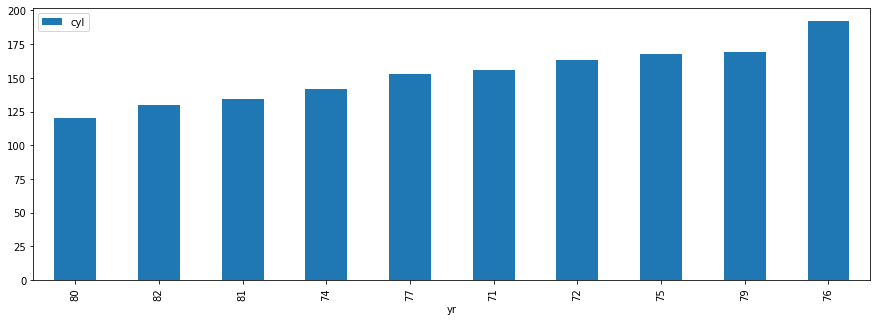

In [21]:
#Bar plot to check number of fuel cylinders required in each year
car.groupby(by=['yr'])['cyl'].sum().reset_index().sort_values(['cyl'],
                    ascending=True).head(10).plot(x='yr',y='cyl',kind='bar', figsize=(15,5))

plt.show()

#### The graph above shows that we have an increase in fuel cylinders every consecutive year

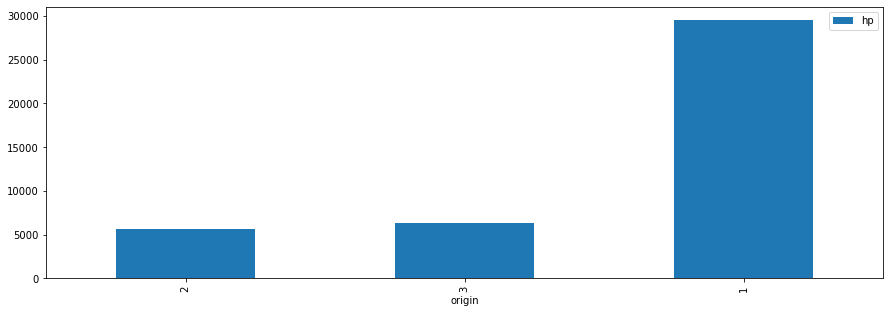

In [22]:
#Bar plot to check highest horsepower vs. Origin
car.groupby(by=['origin'])['hp'].sum().reset_index().sort_values(['hp'],
                    ascending=True).head(10).plot(x='origin',y='hp',kind='bar', figsize=(15,5))

plt.show()

C:\Users\Dhanashri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg', ylabel='hp'>

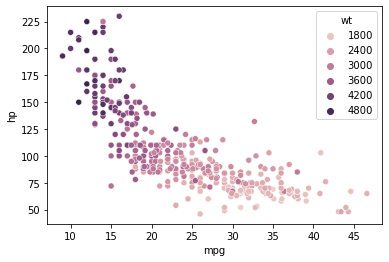

In [23]:
#Scatterplot
sns.scatterplot(car['mpg'],car['hp'],hue=car['wt'])

#### As miles per galon decreases, horsepower and weight increases. This shows linear nature and negative correlation between them

C:\Users\Dhanashri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg', ylabel='disp'>

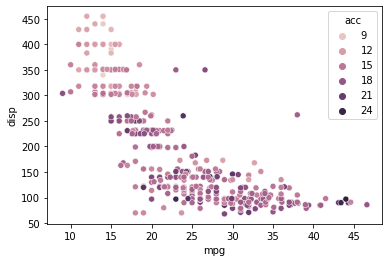

In [24]:
sns.scatterplot(car['mpg'],car['disp'],hue=car['acc'])

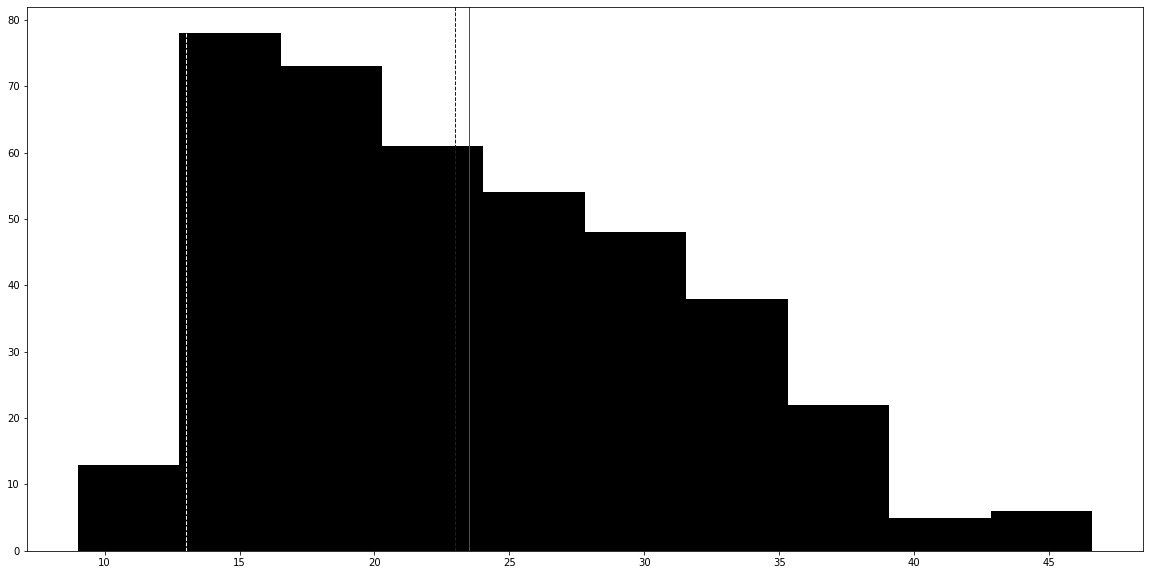

In [25]:
data_hist=car['mpg']
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(data_hist, color=["k"]) # plots a simple histogram
plt.axvline(data_hist.mean(), color='m', linewidth=1)
plt.axvline(data_hist.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(data_hist.mode()[0], color='w', linestyle='dashed', linewidth=1)
#It gives the idea about frequency of TotalCharges

In [26]:
#Statistical Analysis

#IQR of monthly charges
car['mpg'].quantile(0.75)-car['mpg'].quantile(0.25)

11.5

Text(1.15, 20, 'IQR')

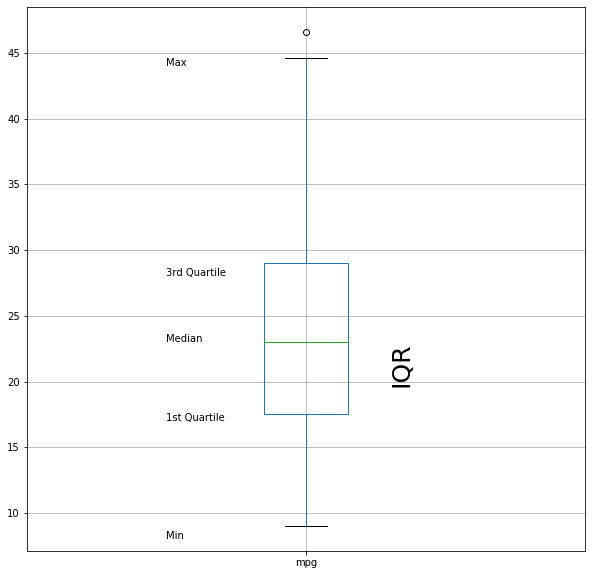

In [27]:
#Create boxplot for column MonthlyCharges
car.boxplot(column="mpg",return_type='axes',figsize=(10,10))

# create text(x=0.74, y=22.25, s="3rd Quartile")like Median, 1st Quartile,Min,Max,IQR:
plt.text(x=0.75, y=28.00, s="3rd Quartile")
plt.text(x=0.75, y=23.00, s="Median")
plt.text(x=0.75, y=17.00, s="1st Quartile")
plt.text(x=0.75, y=8.00, s="Min")
plt.text(x=0.75, y=44.00, s="Max")
plt.text(x=1.15, y=20, s="IQR", rotation=90, size=25)

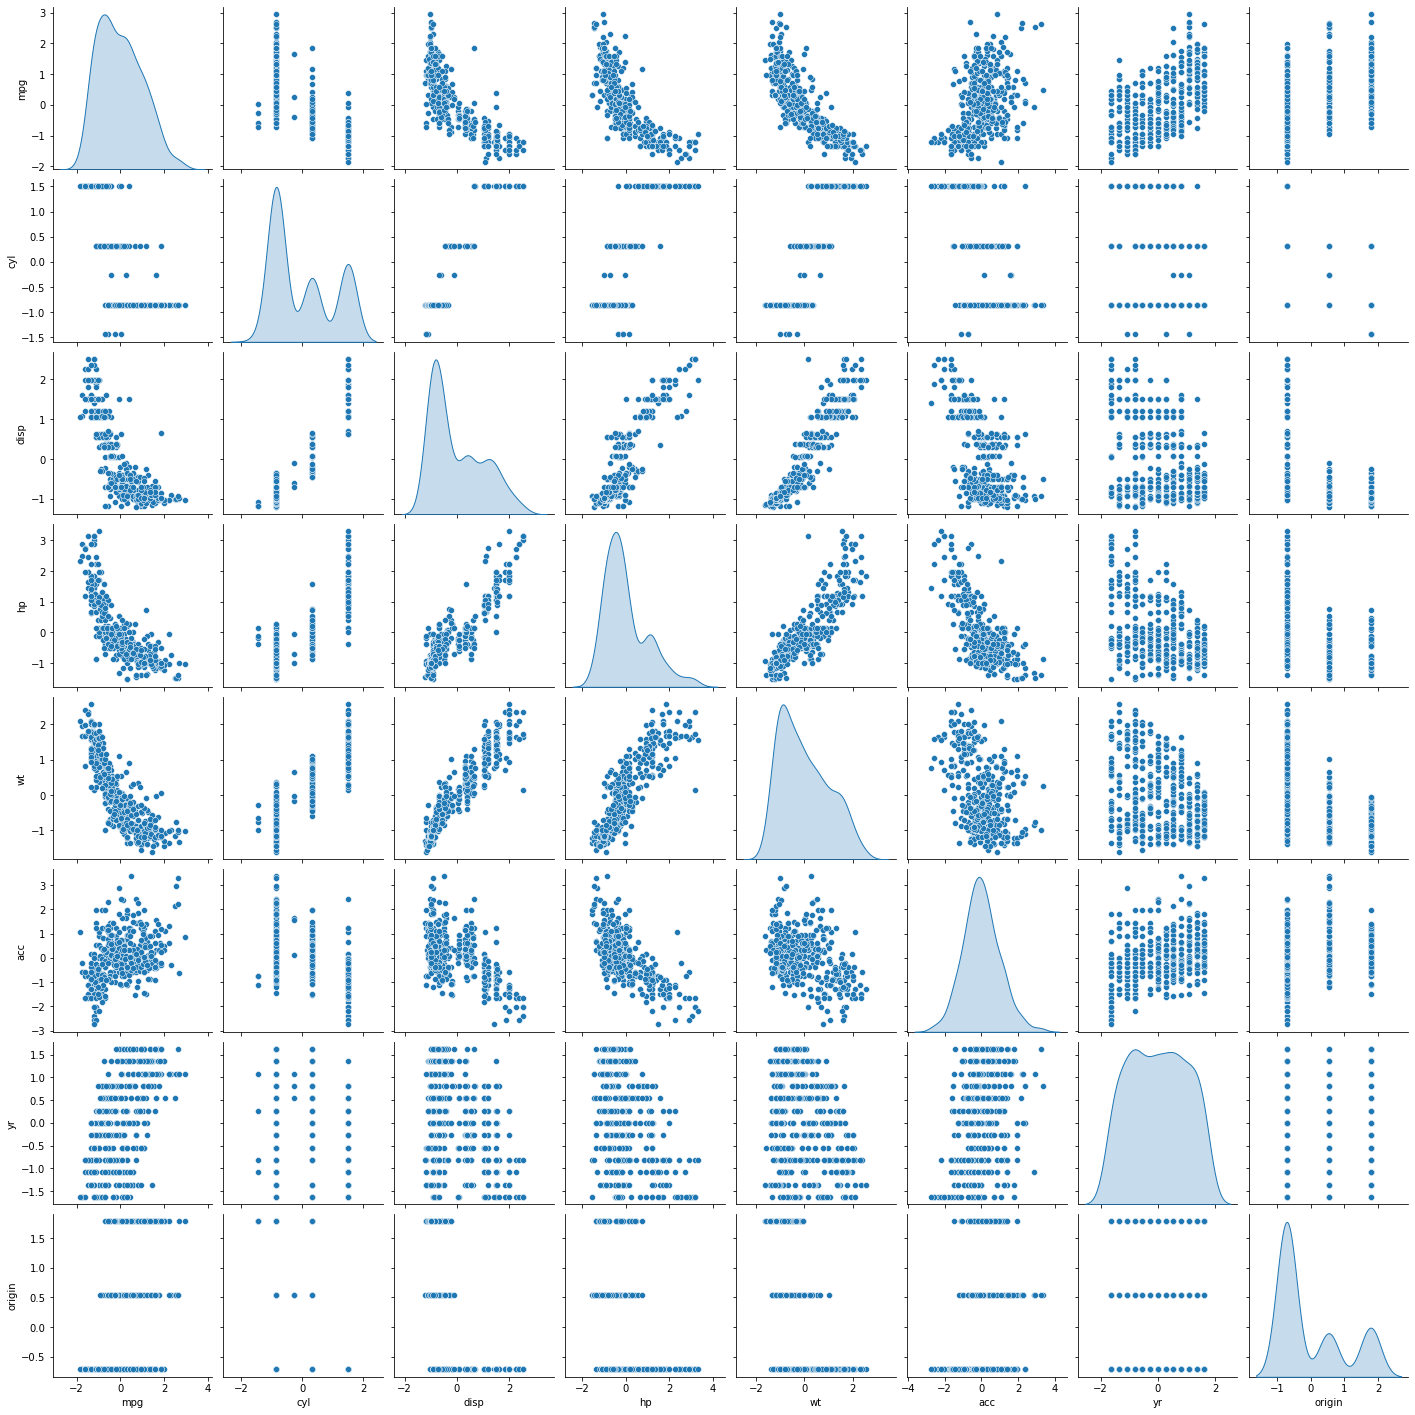

In [28]:
#Apply zscore for better understanding

carScaled=car.apply(zscore)
sns.pairplot(carScaled,diag_kind='kde')

In [29]:
# Measure of dispersion 

#Mean of all attributes
print("\n Mean :\n",car.mean())

#Median
print("\n Median :\n",car.median())

#IQR
print("\n IQR: \n",car.quantile(0.75)-car.quantile(0.25))

#Data Dispersion
print("\n Data Dispersion: \n",car.var())


 Mean :
 mpg         23.514573
cyl          5.454774
disp       193.425879
hp         104.445645
wt        2970.424623
acc         15.568090
yr          76.010050
origin       1.572864
dtype: float64

 Median :
 mpg         23.0
cyl          4.0
disp       148.5
hp          95.0
wt        2803.5
acc         15.5
yr          76.0
origin       1.0
dtype: float64

 IQR: 
 mpg         11.50
cyl          4.00
disp       157.75
hp          49.00
wt        1384.25
acc          3.35
yr           6.00
origin       1.00
dtype: float64

 Data Dispersion: 
 mpg           61.089611
cyl            2.893415
disp       10872.199152
hp          1459.214837
wt        717140.990526
acc            7.604848
yr            13.672443
origin         0.643292
dtype: float64


In [30]:
#Correlation and covariance

print("Covariance of each attribute against every other attribute\n",carScaled.cov())
print("\n Correlation coefficient between every pair of attribute:\n",carScaled.corr())

Covariance of each attribute against every other attribute
              mpg       cyl      disp        hp        wt       acc        yr  \
mpg     1.002519 -0.777349 -0.806229 -0.773729 -0.833836  0.421348  0.580726   
cyl    -0.777349  1.002519  0.953116  0.841454  0.898274 -0.506693 -0.349624   
disp   -0.806229  0.953116  1.002519  0.896272  0.935174 -0.545054 -0.371097   
hp     -0.773729  0.841454  0.896272  1.002519  0.863076 -0.686370 -0.413019   
wt     -0.833836  0.898274  0.935174  0.863076  1.002519 -0.418509 -0.307337   
acc     0.421348 -0.506693 -0.545054 -0.686370 -0.418509  1.002519  0.288863   
yr      0.580726 -0.349624 -0.371097 -0.413019 -0.307337  0.288863  1.002519   
origin  0.564870 -0.563960 -0.610944 -0.454620 -0.582487  0.206392  0.181117   

          origin  
mpg     0.564870  
cyl    -0.563960  
disp   -0.610944  
hp     -0.454620  
wt     -0.582487  
acc     0.206392  
yr      0.181117  
origin  1.002519  

 Correlation coefficient between every pair of 

<AxesSubplot:>

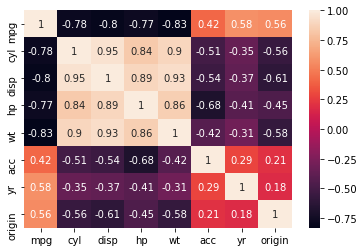

In [31]:
#Heatmap
sns.heatmap(carScaled.corr(),annot=True, annot_kws={'size': 10})

#### cylinder size is highly correlated with engine displacement
#### engine displacement is highly correlated with weight

## 4) Machine Learning

In [257]:
# independant variables
X = car.drop(['mpg'], axis=1)
# the dependent variable
y = car[['mpg']]

In [258]:
# Apply zscore for better results

XScaled=X.apply(zscore)
XScaled.head()

cyl      disp        hp        wt       acc        yr    origin  \
0  1.498191  1.090604  0.669810  0.630870 -1.295498 -1.627426 -0.715145   
1  1.498191  1.503514  1.587201  0.854333 -1.477038 -1.627426 -0.715145   
2  1.498191  1.196232  1.194034  0.550470 -1.658577 -1.627426 -0.715145   
3  1.498191  1.061796  1.194034  0.546923 -1.295498 -1.627426 -0.715145   
4  1.498191  1.042591  0.931922  0.565841 -1.840117 -1.627426 -0.715145   

      GROUP    labels  
0 -1.293949 -0.321738  
1 -1.293949 -0.321738  
2 -1.293949 -0.321738  
3 -1.293949 -0.321738  
4 -1.293949 -0.321738

C:\Users\Dhanashri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

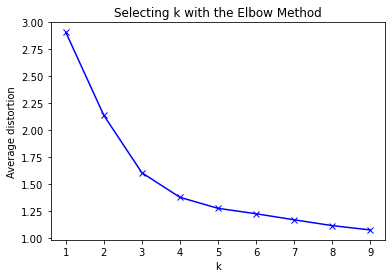

In [259]:
# K-means clustering
#Finding optimal no. of clusters
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(XScaled)
    prediction=model.predict(XScaled)
    meanDistortions.append(sum(np.min(cdist(XScaled, model.cluster_centers_, 'euclidean'), axis=1)) / XScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#### We can mark the bend at 3 and 4

In [260]:
# Let K = 3 , first elbow point
final_model_K3=KMeans(3)
final_model_K3.fit(XScaled)
prediction3=final_model_K3.predict(XScaled)


#Append the prediction 
car["GROUP"] = prediction3
XScaled["GROUP"] = prediction3
print("Groups Assigned : \n")
car.head(30)

Groups Assigned : 



mpg  cyl   disp     hp    wt   acc  yr  origin  GROUP  labels
0   18.0    8  307.0  130.0  3504  12.0  70       1      2       1
1   15.0    8  350.0  165.0  3693  11.5  70       1      2       1
2   18.0    8  318.0  150.0  3436  11.0  70       1      2       1
3   16.0    8  304.0  150.0  3433  12.0  70       1      2       1
4   17.0    8  302.0  140.0  3449  10.5  70       1      2       1
5   15.0    8  429.0  198.0  4341  10.0  70       1      2       1
6   14.0    8  454.0  220.0  4354   9.0  70       1      2       1
7   14.0    8  440.0  215.0  4312   8.5  70       1      2       1
8   14.0    8  455.0  225.0  4425  10.0  70       1      2       1
9   15.0    8  390.0  190.0  3850   8.5  70       1      2       1
10  15.0    8  383.0  170.0  3563  10.0  70       1      2       1
11  14.0    8  340.0  160.0  3609   8.0  70       1      2       1
12  15.0    8  400.0  150.0  3761   9.5  70       1      2       1
13  14.0    8  455.0  225.0  3086  10.0  70       1      2       1
14  24.0    4  113.0   95.0  2372  15.0  70       3      1       0
15  22.0    6  198.0   95.0  2833  15.5  70       1      0       2
16  18.0    6  199.0   97.0  2774  15.5  70       1      0       2
17  21.0    6  200.0   85.0  2587  16.0  70       1      0       2
18  27.0    4   97.0   88.0  2130  14.5  70       3      1       0
19  26.0    4   97.0   46.0  1835  20.5  70       2      1       0
20  25.0    4  110.0   87.0  2672  17.5  70       2      1       0
21  24.0    4  107.0   90.0  2430  14.5  70       2      1       0
22  25.0    4  104.0   95.0  2375  17.5  70       2      1       0
23  26.0    4  121.0  113.0  2234  12.5  70       2      1       0
24  21.0    6  199.0   90.0  2648  15.0  70       1      0       2
25  10.0    8  360.0  215.0  4615  14.0  70       1      2       1
26  10.0    8  307.0  200.0  4376  15.0  70       1      2       1
27  11.0    8  318.0  210.0  4382  13.5  70       1      2       1
28   9.0    8  304.0  193.0  4732  18.5  70       1      2       1
29  27.0    4   97.0   88.0  2130  14.5  71       3      1       0

In [261]:
carClust_K3 = car.groupby(['GROUP'])
carClust_K3.mean()

mpg       cyl        disp          hp           wt        acc  \
GROUP                                                                        
0      24.036145  5.114458  176.930723   90.593843  2876.421687  16.853614   
1      29.329630  4.059259  102.629630   80.265103  2242.800000  16.090370   
2      14.528866  7.979381  348.020619  161.804124  4143.969072  12.641237   

              yr    origin    labels  
GROUP                                 
0      77.066265  1.084337  2.915663  
1      76.422222  2.585185  0.000000  
2      73.628866  1.000000  1.000000

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'labels'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>]],
      dtype=object)

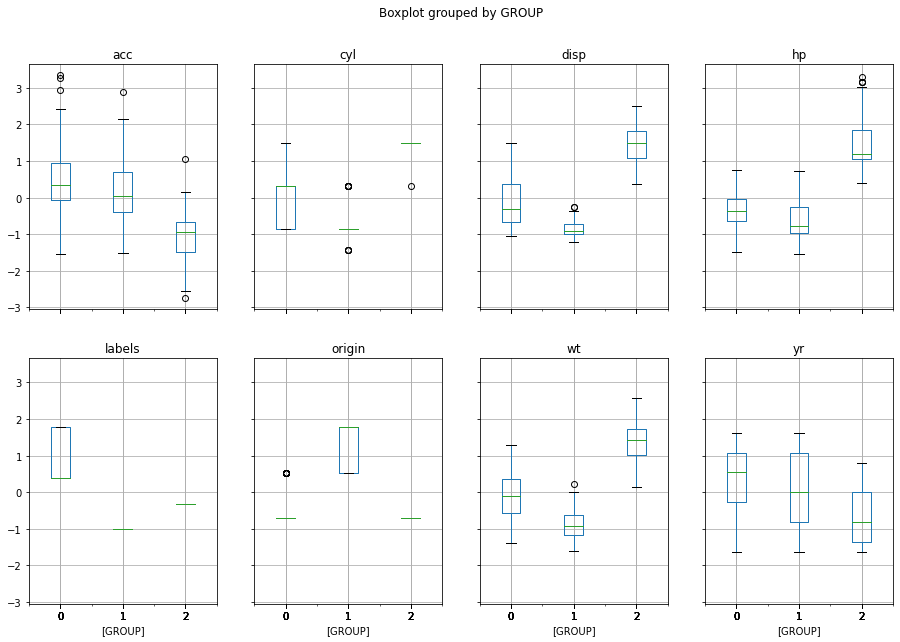

In [262]:
XScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [263]:
#  Let K = 4, the next elbow point
final_model_K4=KMeans(4)
final_model_K4.fit(XScaled)
prediction4=final_model_K4.predict(XScaled)


In [264]:
#Append the prediction 
car["GROUP"] = prediction4
XScaled["GROUP"] = prediction4
print("Groups Assigned : \n")
car.head(30)

Groups Assigned : 



mpg  cyl   disp     hp    wt   acc  yr  origin  GROUP  labels
0   18.0    8  307.0  130.0  3504  12.0  70       1      2       1
1   15.0    8  350.0  165.0  3693  11.5  70       1      2       1
2   18.0    8  318.0  150.0  3436  11.0  70       1      2       1
3   16.0    8  304.0  150.0  3433  12.0  70       1      2       1
4   17.0    8  302.0  140.0  3449  10.5  70       1      2       1
5   15.0    8  429.0  198.0  4341  10.0  70       1      2       1
6   14.0    8  454.0  220.0  4354   9.0  70       1      2       1
7   14.0    8  440.0  215.0  4312   8.5  70       1      2       1
8   14.0    8  455.0  225.0  4425  10.0  70       1      2       1
9   15.0    8  390.0  190.0  3850   8.5  70       1      2       1
10  15.0    8  383.0  170.0  3563  10.0  70       1      2       1
11  14.0    8  340.0  160.0  3609   8.0  70       1      2       1
12  15.0    8  400.0  150.0  3761   9.5  70       1      2       1
13  14.0    8  455.0  225.0  3086  10.0  70       1      2       1
14  24.0    4  113.0   95.0  2372  15.0  70       3      1       0
15  22.0    6  198.0   95.0  2833  15.5  70       1      0       2
16  18.0    6  199.0   97.0  2774  15.5  70       1      0       2
17  21.0    6  200.0   85.0  2587  16.0  70       1      0       2
18  27.0    4   97.0   88.0  2130  14.5  70       3      1       0
19  26.0    4   97.0   46.0  1835  20.5  70       2      1       0
20  25.0    4  110.0   87.0  2672  17.5  70       2      1       0
21  24.0    4  107.0   90.0  2430  14.5  70       2      1       0
22  25.0    4  104.0   95.0  2375  17.5  70       2      1       0
23  26.0    4  121.0  113.0  2234  12.5  70       2      1       0
24  21.0    6  199.0   90.0  2648  15.0  70       1      0       2
25  10.0    8  360.0  215.0  4615  14.0  70       1      2       1
26  10.0    8  307.0  200.0  4376  15.0  70       1      2       1
27  11.0    8  318.0  210.0  4382  13.5  70       1      2       1
28   9.0    8  304.0  193.0  4732  18.5  70       1      2       1
29  27.0    4   97.0   88.0  2130  14.5  71       3      1       0

In [265]:
carClust_K4 = XScaled.groupby(['GROUP'])
carClust_K4.mean()

cyl      disp        hp        wt       acc        yr    origin  \
GROUP                                                                         
0      0.412033  0.331543 -0.094716  0.328865  0.352621 -0.025287 -0.655699   
1     -0.821439 -0.871878 -0.633801 -0.860303  0.189629  0.111610  1.263748   
2      1.486055  1.484507  1.503434  1.387534 -1.062679 -0.644787 -0.715145   
3     -0.827607 -0.660285 -0.637974 -0.561885  0.583656  0.604892 -0.562905   

         labels  
GROUP            
0      0.377998  
1     -1.021475  
2     -0.321738  
3      1.675071

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'labels'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>]],
      dtype=object)

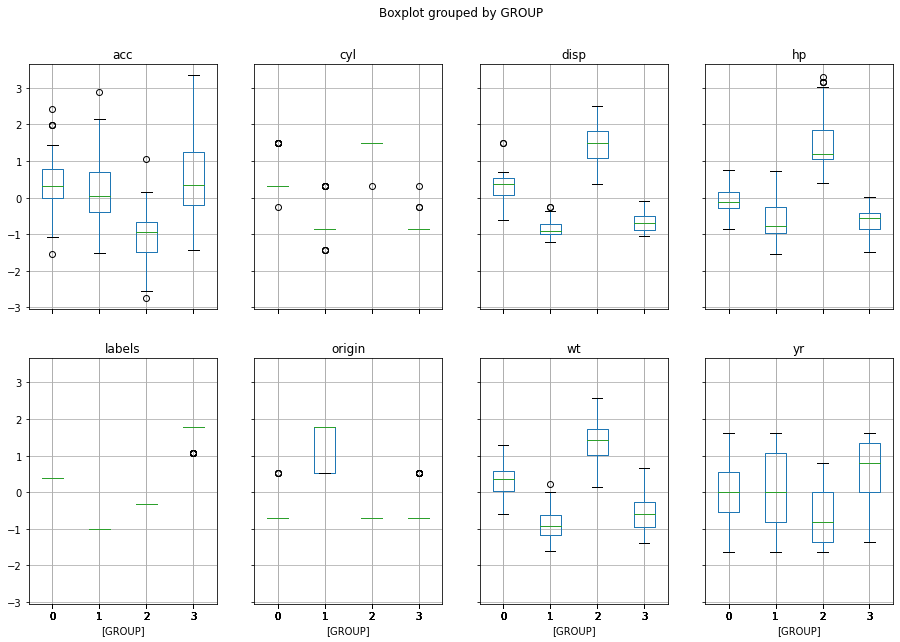

In [266]:
XScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [283]:
# Hierarchial Clustering
# Number of clusters=3
model_H3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model_H3.fit(XScaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [284]:
car['labels'] = model_H3.labels_
car.head(100)

mpg  cyl   disp     hp    wt   acc  yr  origin  GROUP  labels
0   18.0    8  307.0  130.0  3504  12.0  70       1      2       1
1   15.0    8  350.0  165.0  3693  11.5  70       1      2       1
2   18.0    8  318.0  150.0  3436  11.0  70       1      2       1
3   16.0    8  304.0  150.0  3433  12.0  70       1      2       1
4   17.0    8  302.0  140.0  3449  10.5  70       1      2       1
..   ...  ...    ...    ...   ...   ...  ..     ...    ...     ...
95  12.0    8  455.0  225.0  4951  11.0  73       1      2       1
96  13.0    8  360.0  175.0  3821  11.0  73       1      2       1
97  18.0    6  225.0  105.0  3121  16.5  73       1      0       0
98  16.0    6  250.0  100.0  3278  18.0  73       1      0       0
99  18.0    6  232.0  100.0  2945  16.0  73       1      0       0

[100 rows x 10 columns]

In [285]:
carClust_H3 = car.groupby(['labels'])

In [286]:
carClust_H3.mean()

mpg       cyl        disp          hp           wt        acc  \
labels                                                                        
0       25.646119  4.863014  150.698630   88.153806  2628.575342  16.262557   
1       14.528866  7.979381  348.020619  161.804124  4143.969072  12.641237   
2       28.451220  4.048780  124.664634   80.105895  2495.195122  17.175610   

               yr    origin     GROUP  
labels                                 
0       76.228311  1.995434  0.616438  
1       73.628866  1.000000  2.000000  
2       78.243902  1.121951  3.000000

In [287]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z3_a = linkage(XScaled, metric='euclidean', method='average')
c3_a, coph_dists3_a = cophenet(Z3_a , pdist(XScaled))

c3_a

0.8507636089066362

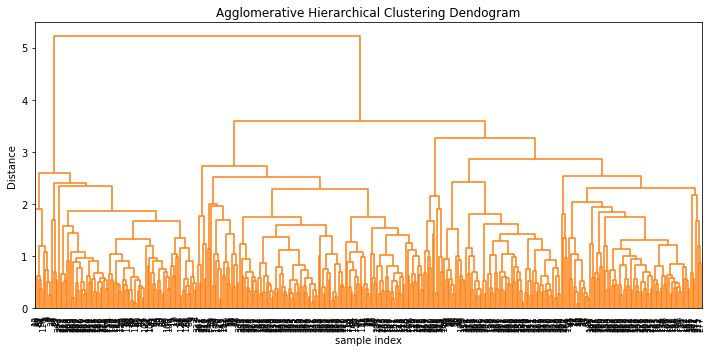

In [47]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z3_a, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [288]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z3_c = linkage(XScaled, metric='euclidean', method='complete')
c3_c, coph_dists3_c = cophenet(Z3_c , pdist(XScaled))

c3_c

0.8030122142415057

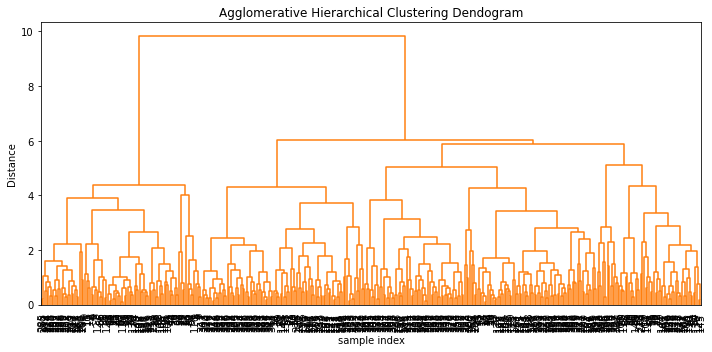

In [49]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z3_c, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [289]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z3_w = linkage(XScaled, metric='euclidean', method='ward')
c3_w, coph_dists3_w = cophenet(Z3_w , pdist(XScaled))

c3_w

0.8021589267312469

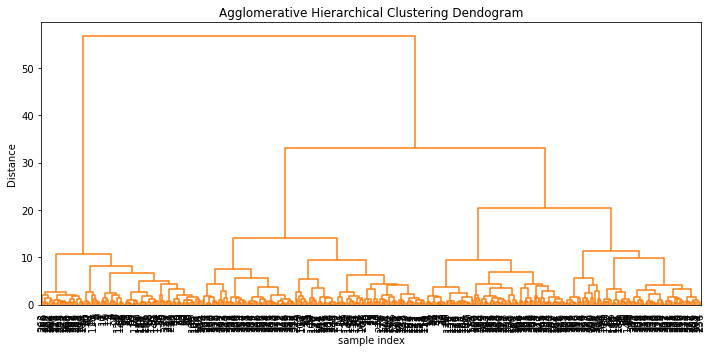

In [51]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z3_w, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

In [290]:
# Hierarchial Clustering
# Number of clusters=5
model_H5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='average')
model_H5.fit(XScaled)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [291]:
car['labels'] = model_H5.labels_
car.head(100)

mpg  cyl   disp     hp    wt   acc  yr  origin  GROUP  labels
0   18.0    8  307.0  130.0  3504  12.0  70       1      2       1
1   15.0    8  350.0  165.0  3693  11.5  70       1      2       1
2   18.0    8  318.0  150.0  3436  11.0  70       1      2       1
3   16.0    8  304.0  150.0  3433  12.0  70       1      2       1
4   17.0    8  302.0  140.0  3449  10.5  70       1      2       1
..   ...  ...    ...    ...   ...   ...  ..     ...    ...     ...
95  12.0    8  455.0  225.0  4951  11.0  73       1      2       1
96  13.0    8  360.0  175.0  3821  11.0  73       1      2       1
97  18.0    6  225.0  105.0  3121  16.5  73       1      0       3
98  16.0    6  250.0  100.0  3278  18.0  73       1      0       3
99  18.0    6  232.0  100.0  2945  16.0  73       1      0       3

[100 rows x 10 columns]

In [292]:
carClust_H5 = car.groupby(['labels'])

In [293]:
carClust_H5.mean()

mpg       cyl        disp          hp           wt        acc  \
labels                                                                        
0       29.329630  4.059259  102.629630   80.265103  2242.800000  16.090370   
1       14.528866  7.979381  348.020619  161.804124  4143.969072  12.641237   
2       27.871429  4.000000  125.221429   82.609763  2446.814286  16.365714   
3       19.726190  6.154762  227.952381  100.832077  3248.571429  16.539286   
4       31.833333  4.333333  121.416667   65.500000  2777.416667  21.900000   

               yr    origin  GROUP  
labels                              
0       76.422222  2.585185      1  
1       73.628866  1.000000      2  
2       78.085714  1.000000      3  
3       75.916667  1.047619      0  
4       79.166667  1.833333      3

In [294]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z5_a = linkage(XScaled, metric='euclidean', method='average')
c5_a, coph_dists5_a = cophenet(Z5_a , pdist(XScaled))

c5_a

0.8507636089066362

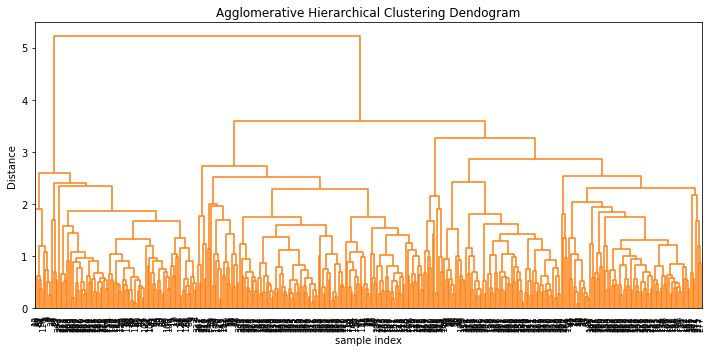

In [57]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z5_a, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [295]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z5_c = linkage(XScaled, metric='euclidean', method='complete')
c5_c, coph_dists5_c = cophenet(Z5_c , pdist(XScaled))

c5_c

0.8030122142415057

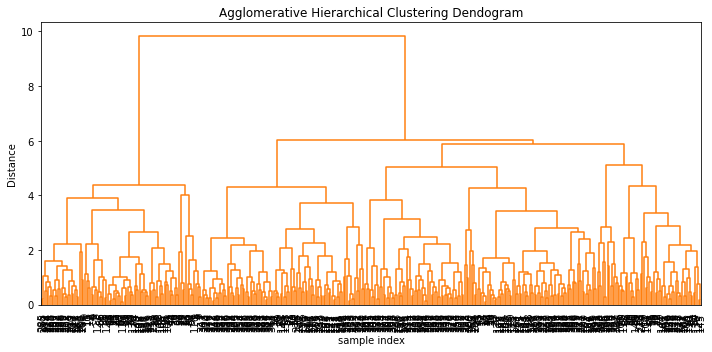

In [59]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z5_c, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [296]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z5_w = linkage(XScaled, metric='euclidean', method='ward')
c5_w, coph_dists5_w = cophenet(Z5_w , pdist(XScaled))

c5_w

0.8021589267312469

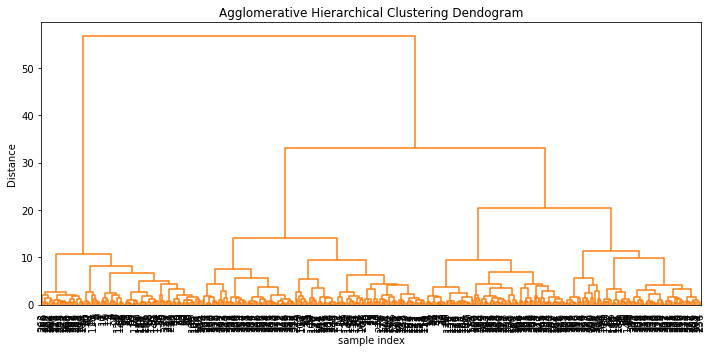

In [61]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z5_w, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

## 5) Outcomes of using ML based methods

#### K-Means Clustering

#### With number of clusters as 3 
    The cylinder size of Group 0 and 1 is not dispered or the dispersion is not visible due to outliers. Similarly Country of Origin is not dispersed for Group 1 and 2
    Displacement has a few outliers for Group 0 and 1 and hp has a few outliers for Group 1 and 2
    
#### With number of clusters as 4
    Acceleration is dispersed but still have a few outliers in each group
    Cylinder is not dispersed at all and have outliers in each group
    Displacement is not much dispersed and have outliers for each group
    hp has outliers for group 0 only
    Country of origin is not dispersed for group 0,2 and 3
    Wt. and year is quite dispersed for all groups
    
#### Conclusion
    Even if we increase the number of clusters from 3 to 4 we do not gain much. Box plot clearly shows the dispersion and outliers and the condition is better for k=3
    
    
#### Hiearachical Clustering

#### With number of clusters as 3
    cophenet index where the distance between datapoints has been calculated using'euclidean'distance and 'average' linkage has been used : 85.9%
    cophenet index where the distance between datapoints has been calculated using'euclidean'distance and 'complete' linkage has been used : 84.3%
    cophenet index where the distance between datapoints has been calculated using'euclidean'distance and 'ward' linkage has been used : 84.6%
    
#### With number of clusters as 5
    cophenet index where the distance between datapoints has been calculated using'euclidean'distance and 'average' linkage has been used : 79.4%
    cophenet index where the distance between datapoints has been calculated using'euclidean'distance and 'complete' linkage has been used : 75.9%
    cophenet index where the distance between datapoints has been calculated using'euclidean'distance and 'ward' linkage has been used : 78.1%
    
#### Looking at the cophenet index and Dendogram, we get to the conclusion that number of clusters should be 3

### Final Conclusion
#### Both K-means and Hierarchical Clustering gives better results with number of clusters =3
#### Therefore , we come to the conclusion that number of clusters should be 3

In [267]:
# Linear Regression model on different clusters
regression_model = LinearRegression()
regression_model.fit(XScaled, y)
print("Linear regression on entire data set : ",regression_model.score(XScaled, y))


Linear regression on entire data set :  0.8384410652323043


In [268]:
Xkmeans3 = final_model_K3.transform(XScaled)
regression_model_kmeans3 = LinearRegression()
regression_model_kmeans3.fit(Xkmeans3, y)
print("Linear regression with k-means clustering (k=3): ",regression_model_kmeans3.score(Xkmeans3, y))

Linear regression with k-means clustering (k=3):  0.734797969910937


In [64]:
Xkmeans4 = final_model_K4.transform(XScaled)
regression_model_kmeans4 = LinearRegression()
regression_model_kmeans4.fit(Xkmeans4, y)
print("Linear regression with k-means clustering (k=4) : ",regression_model_kmeans4.score(Xkmeans4, y))

Linear regression with k-means clustering (k=4) :  0.7634975562279203


# Part II

In [211]:
#Import all data sets
company=pd.read_excel("Part2 - Company.xlsx")

In [212]:
#Explore shape and size
company.head(20)

A    B    C    D    Quality
0    47   27   45  108  Quality A
1   174  133  134  166  Quality B
2   159  163  135  131        NaN
3    61   23    3   44  Quality A
4    59   60    9   68  Quality A
5   153  140  154  199        NaN
6    34   28   78   22  Quality A
7   191  144  143  154        NaN
8   160  181  194  178  Quality B
9   145  178  158  141        NaN
10   76   94  107   37  Quality A
11  138  200  153  192  Quality B
12   27  106   57   37  Quality A
13   45   76   56   57  Quality A
14  186  142  146  174        NaN
15  196  145  166  132  Quality B
16    4   61   72   98  Quality A
17   96  109   75   34  Quality A
18  167  171  163  191        NaN
19  196  178  165  177  Quality B

In [213]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


Now seperate the dataset based on Quality: One dataset where value for Quality is present and other dataset where we have to predict the Quality

In [214]:
company_QA = company.dropna()
company_QA.reset_index(drop=True, inplace=True)
company_QA.shape

(43, 5)

In [215]:
is_NaN = company.isnull()
row_has_NaN = is_NaN.any(axis=1)
company_Nan_QA = company[row_has_NaN]

In [216]:
company_Nan_QA.head()

A    B    C    D Quality
2   159  163  135  131     NaN
5   153  140  154  199     NaN
7   191  144  143  154     NaN
9   145  178  158  141     NaN
14  186  142  146  174     NaN

In [217]:
company_QA.describe().transpose()

count        mean        std  min   25%    50%    75%    max
A   43.0  101.627907  61.292827  3.0  47.0  101.0  159.5  200.0
B   43.0  104.232558  59.847758  5.0  60.0  100.0  160.0  200.0
C   43.0  100.627907  65.913733  3.0  50.5   83.0  165.5  200.0
D   43.0   96.720930  62.511075  3.0  39.0   88.0  158.5  198.0

In [218]:
# independant variables
train_data_x = company_QA.drop(['Quality'], axis=1)
# the dependent variable
train_data_y = company_QA[['Quality']]

In [219]:
# Train the dataset where we have Quality
from scipy.stats import zscore
quality_train_Data_Scaled=train_data_x.apply(zscore)
quality_train_Data_Scaled.head()

A         B         C         D
0 -0.901809 -1.305756 -0.853938  0.182569
1  1.194734  0.486366  0.512291  1.121385
2 -0.670694 -1.373384 -1.498676 -0.853367
3 -0.703710 -0.747831 -1.406570 -0.464891
4 -1.116416 -1.288849 -0.347359 -1.209469

In [220]:
# Let us first start with K = 2
final_model_q=KMeans(2)
final_model_q.fit(quality_train_Data_Scaled)
prediction_q=final_model_q.predict(quality_train_Data_Scaled)

#Append the prediction 
company_QA["GROUP"] = prediction_q
quality_train_Data_Scaled["GROUP"] = prediction_q
print("Groups Assigned : \n")
company_QA.head()

Groups Assigned : 



<ipython-input-220-60f552176d02>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_QA["GROUP"] = prediction_q


A    B    C    D    Quality  GROUP
0   47   27   45  108  Quality A      0
1  174  133  134  166  Quality B      1
2   61   23    3   44  Quality A      0
3   59   60    9   68  Quality A      0
4   34   28   78   22  Quality A      0

In [221]:
quality_Clust = company_QA.groupby(['GROUP'])
quality_Clust.mean()

A           B           C           D
GROUP                                                
0       58.769231   62.230769   53.000000   51.807692
1      167.176471  168.470588  173.470588  165.411765

Looking at training data we have 2 clusters with Quality A and Quality B , these 2 values in 'Quality' column

In [234]:
# Seperate the independent and dependent variable
test_data_x=company_Nan_QA.drop(['Quality'], axis=1)
test_data_y=company_Nan_QA['Quality']

In [223]:
#Scale the data
quality_test_Data_Scaled=test_data_x.apply(zscore)
quality_test_Data_Scaled.head()

A         B         C         D
2   0.000000  0.421989 -0.214062 -0.640709
5  -0.148482 -0.158421  0.148360  1.045803
7   0.791902 -0.057480 -0.061463 -0.070271
9  -0.346457  0.800517  0.224659 -0.392693
14  0.668168 -0.107951 -0.004239  0.425762

In [235]:
#K means clustering
final_model_q_t=KMeans(2)
final_model_q_t.fit(quality_test_Data_Scaled)
prediction_q_t=final_model_q_t.predict(quality_test_Data_Scaled)

#Append the prediction 
company_Nan_QA["GROUP"] = prediction_q_t
quality_test_Data_Scaled["GROUP"] = prediction_q_t
print("Groups Assigned : \n")
company_Nan_QA.head(20)

Groups Assigned : 



<ipython-input-235-cf5e3ce52ff3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_Nan_QA["GROUP"] = prediction_q_t


A    B    C    D    Quality  GROUP
2   159  163  135  131  Quality B      0
5   153  140  154  199  Quality B      0
7   191  144  143  154  Quality B      0
9   145  178  158  141  Quality B      0
14  186  142  146  174  Quality B      0
18  167  171  163  191  Quality B      0
23  171  185  181  183  Quality B      0
27  193  169  199  155  Quality B      0
29   29   49    6   35  Quality A      1
32  161  138  143  139  Quality B      0
35  181  147  174  130  Quality B      0
40  179  143  189  177  Quality B      0
46  197  173  165  197  Quality B      0
52  188  178  175  162  Quality B      0
57  137  182  165  199  Quality B      0
58   88   39    9  102  Quality A      1
59  180  157  192  198  Quality B      0
60  157  135  135  156  Quality B      0

In [236]:
company_Nan_QA.loc[company_Nan_QA["GROUP"] == 0, "Quality"] = 'Quality A'
company_Nan_QA.loc[company_Nan_QA["GROUP"] == 1, "Quality"] = 'Quality B'

C:\Users\Dhanashri\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Dhanashri\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [237]:
company_Nan_QA.head(20)

A    B    C    D    Quality  GROUP
2   159  163  135  131  Quality A      0
5   153  140  154  199  Quality A      0
7   191  144  143  154  Quality A      0
9   145  178  158  141  Quality A      0
14  186  142  146  174  Quality A      0
18  167  171  163  191  Quality A      0
23  171  185  181  183  Quality A      0
27  193  169  199  155  Quality A      0
29   29   49    6   35  Quality B      1
32  161  138  143  139  Quality A      0
35  181  147  174  130  Quality A      0
40  179  143  189  177  Quality A      0
46  197  173  165  197  Quality A      0
52  188  178  175  162  Quality A      0
57  137  182  165  199  Quality A      0
58   88   39    9  102  Quality B      1
59  180  157  192  198  Quality A      0
60  157  135  135  156  Quality A      0

We are able to impute the Quality to the test dataset which we have seperated in the beginning

# Part III

## 1) Import, clean and pre-process the data

In [318]:
vehicle = pd.read_csv("Part3 - vehicle.csv")
vehicle.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [319]:
vehicle.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [320]:
#Shape of  dataset
vehicle.shape

(846, 19)

In [321]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [322]:
#Check for null values
vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [323]:
# Replace the null values with meadian
vehicle['circularity'] = vehicle['circularity'].fillna(vehicle['circularity'].median())
vehicle['distance_circularity'] = vehicle['distance_circularity'].fillna(vehicle['distance_circularity'].median())
vehicle['radius_ratio'] = vehicle['radius_ratio'].fillna(vehicle['radius_ratio'].median())
vehicle['pr.axis_aspect_ratio'] = vehicle['pr.axis_aspect_ratio'].fillna(vehicle['pr.axis_aspect_ratio'].median())
vehicle['scatter_ratio'] = vehicle['scatter_ratio'].fillna(vehicle['scatter_ratio'].median())
vehicle['elongatedness'] = vehicle['elongatedness'].fillna(vehicle['elongatedness'].median())
vehicle['pr.axis_rectangularity'] = vehicle['pr.axis_rectangularity'].fillna(vehicle['pr.axis_rectangularity'].median())
vehicle['scaled_variance'] = vehicle['scaled_variance'].fillna(vehicle['scaled_variance'].median())
vehicle['scaled_variance.1'] = vehicle['scaled_variance.1'].fillna(vehicle['scaled_variance.1'].median())
vehicle['scaled_radius_of_gyration'] = vehicle['scaled_radius_of_gyration'].fillna(vehicle['scaled_radius_of_gyration'].median())
vehicle['scaled_radius_of_gyration.1'] = vehicle['scaled_radius_of_gyration.1'].fillna(vehicle['scaled_radius_of_gyration.1'].median())
vehicle['skewness_about'] = vehicle['skewness_about'].fillna(vehicle['skewness_about'].median())
vehicle['skewness_about.1'] = vehicle['skewness_about.1'].fillna(vehicle['skewness_about.1'].median())
vehicle['skewness_about.2'] = vehicle['skewness_about.2'].fillna(vehicle['skewness_about.2'].median())

In [324]:
vehicle.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

## 2) EDA & visualisation

In [325]:
# Detailed analysis on the data
vehicle.groupby(['class']).count()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus            218          218                   218           218   
car            429          429                   429           429   
van            199          199                   199           199   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                     218                      218            218   
car                     429                      429            429   
van                     199                      199            199   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus              218                     218                        218   
car              429                     429                        429   
van              199                     199                        199   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus                218                218                        218   
car                429                429                        429   
van                199                199                        199   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                            218             218               218   
car                            429             429               429   
van                            199             199               199   

       skewness_about.2  hollows_ratio  
class                                   
bus                 218            218  
car                 429            429  
van                 199            199

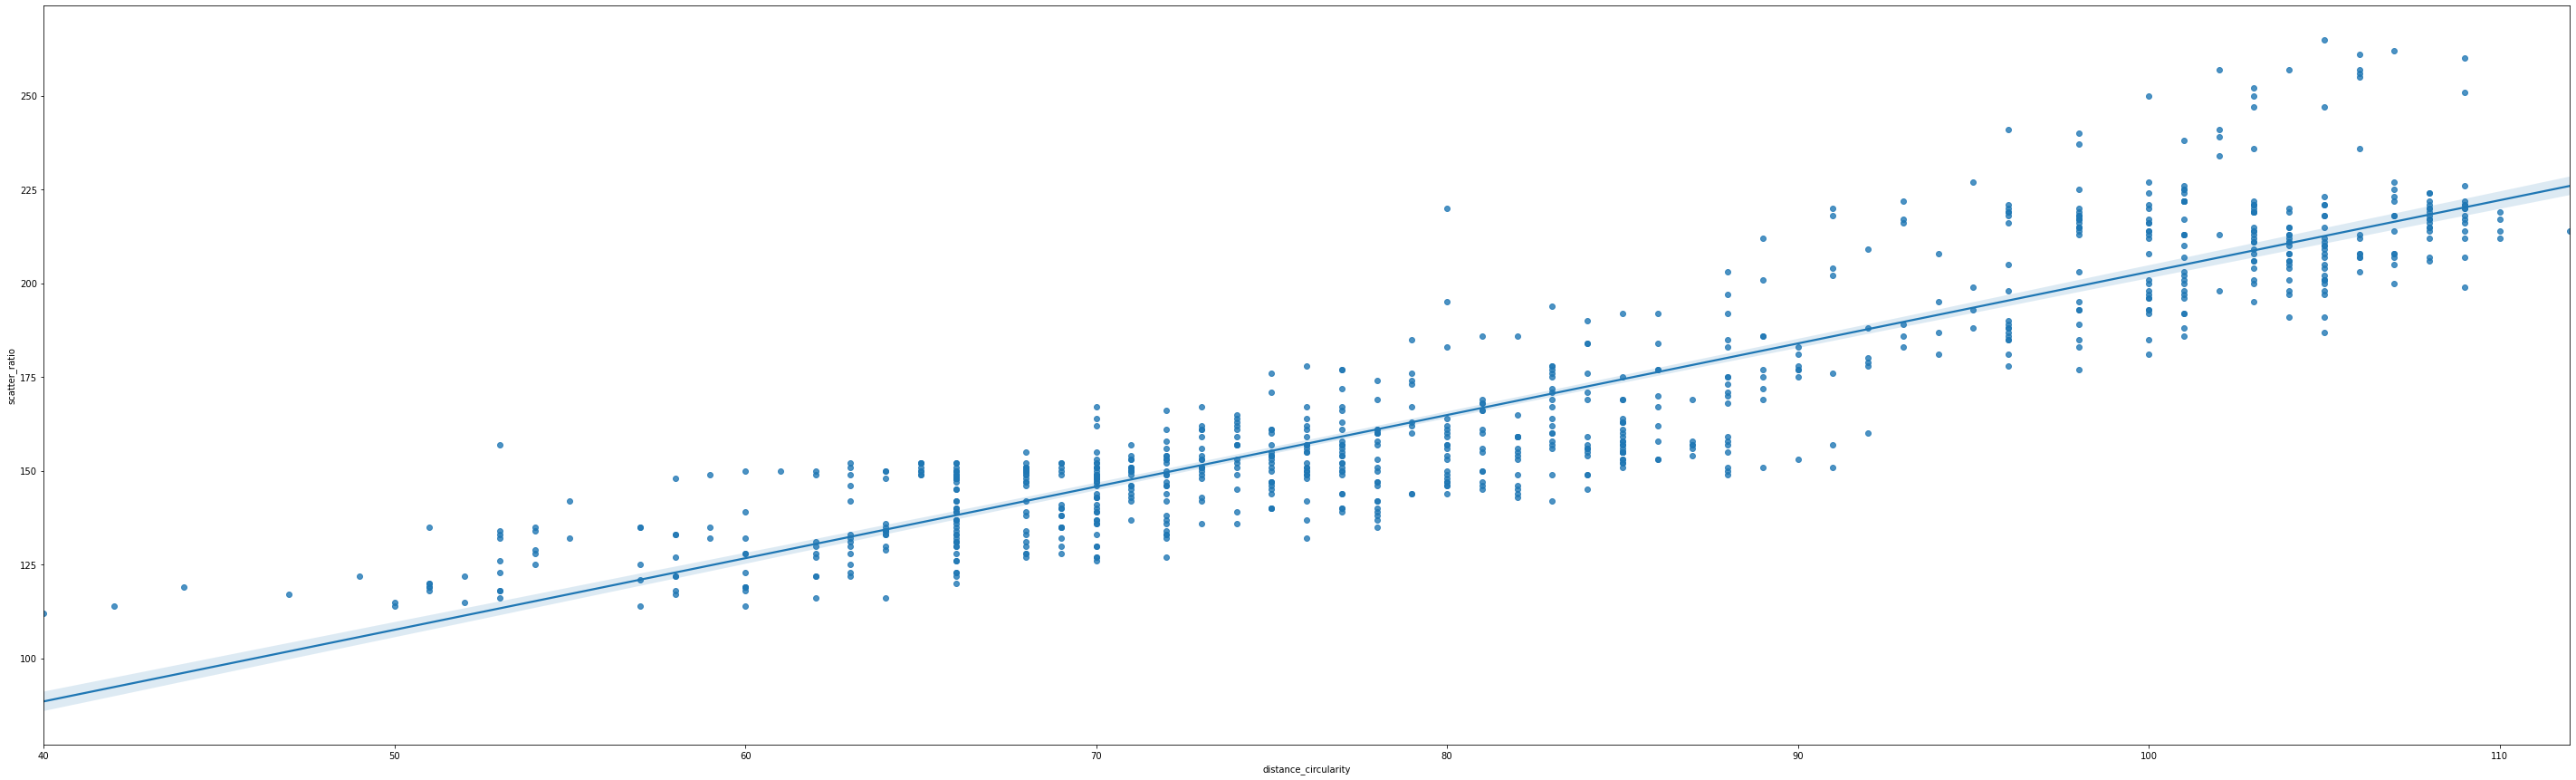

In [326]:
# regression plot - scatter plot with a regression line
figure = plt.figure(figsize=(50,15))
ax = sns.regplot(x='distance_circularity',y='scatter_ratio', data=vehicle )

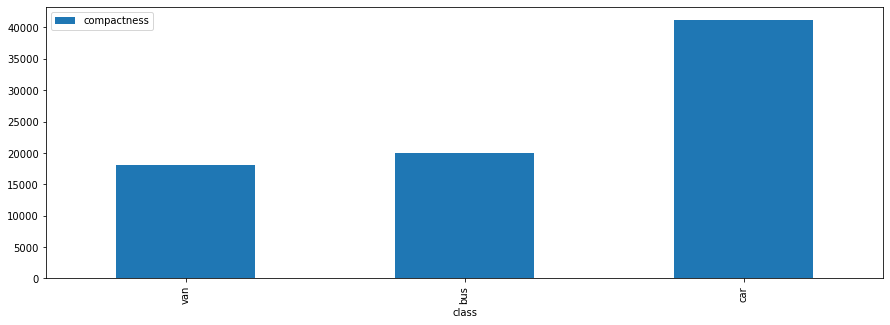

In [327]:
#Bar plot to check compactness of each class
vehicle.groupby(by=['class'])['compactness'].sum().reset_index().sort_values(['compactness'],
                    ascending=True).head(10).plot(x='class',y='compactness',kind='bar', figsize=(15,5))

plt.show()

C:\Users\Dhanashri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='scatter_ratio', ylabel='circularity'>

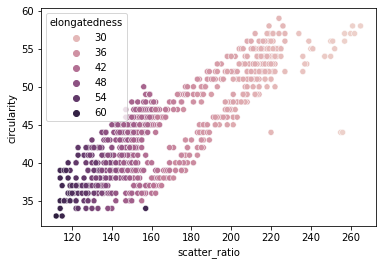

In [328]:
#Scatterplot
sns.scatterplot(vehicle['scatter_ratio'],vehicle['circularity'],hue=vehicle['elongatedness'])

C:\Users\Dhanashri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='skewness_about.2', ylabel='skewness_about'>

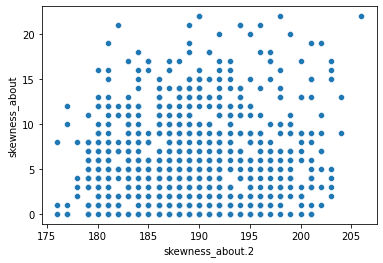

In [329]:
#Scatterplot
sns.scatterplot(vehicle['skewness_about.2'],vehicle['skewness_about'])

<AxesSubplot:xlabel='class', ylabel='skewness_about'>

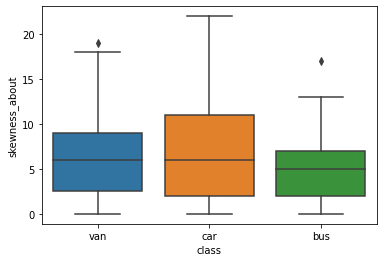

In [330]:
#Univariate Analysis
sns.boxplot(x=vehicle['class'],y=vehicle['skewness_about'])

<AxesSubplot:xlabel='class', ylabel='hollows_ratio'>

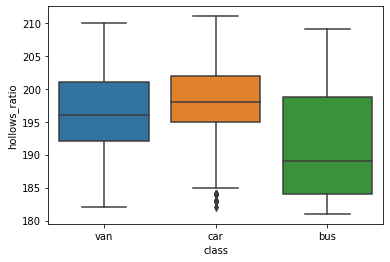

In [331]:
sns.boxplot(x=vehicle['class'],y=vehicle['hollows_ratio'])

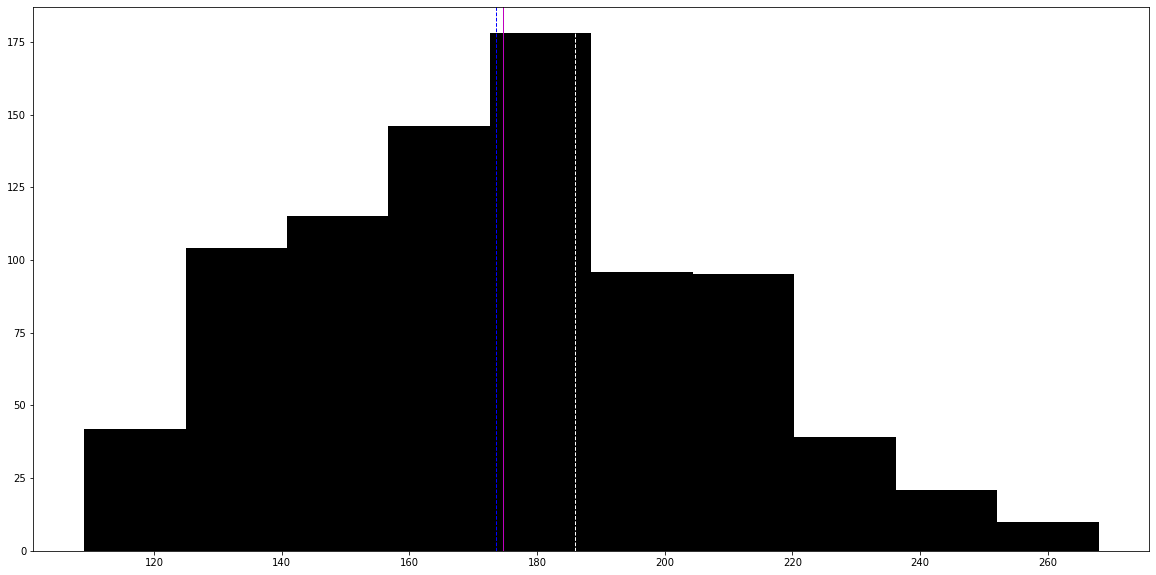

In [332]:
data_hist=vehicle['scaled_radius_of_gyration']
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(data_hist, color=["k"]) # plots a simple histogram
plt.axvline(data_hist.mean(), color='m', linewidth=1)
plt.axvline(data_hist.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(data_hist.mode()[0], color='w', linestyle='dashed', linewidth=1)


In [333]:
#Statistical Analysis

#IQR of monthly charges
vehicle['scaled_variance'].quantile(0.75)-vehicle['scaled_variance'].quantile(0.25)

50.0

Text(1.15, 180, 'IQR')

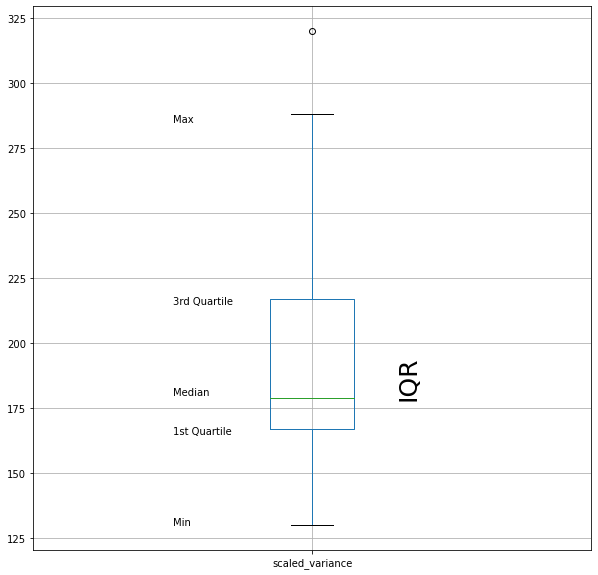

In [334]:
#Create boxplot for column scaled_variance
vehicle.boxplot(column="scaled_variance",return_type='axes',figsize=(10,10))

# create text(x=0.74, y=22.25, s="3rd Quartile")like Median, 1st Quartile,Min,Max,IQR:
plt.text(x=0.75, y=215.00, s="3rd Quartile")
plt.text(x=0.75, y=180.00, s="Median")
plt.text(x=0.75, y=165.00, s="1st Quartile")
plt.text(x=0.75, y=130.00, s="Min")
plt.text(x=0.75, y=285.00, s="Max")
plt.text(x=1.15, y=180, s="IQR", rotation=90, size=25)

In [335]:
# Measure of dispersion 

#Mean of all attributes
print("\n Mean :\n",vehicle.mean())

#Median
print("\n Median :\n",vehicle.median())

#IQR
print("\n IQR: \n",vehicle.quantile(0.75)-vehicle.quantile(0.25))

#Data Dispersion
print("\n Data Dispersion: \n",vehicle.var())


 Mean :
 compactness                     93.678487
circularity                     44.823877
distance_circularity            82.100473
radius_ratio                   168.874704
pr.axis_aspect_ratio            61.677305
max.length_aspect_ratio          8.567376
scatter_ratio                  168.887707
elongatedness                   40.936170
pr.axis_rectangularity          20.580378
max.length_rectangularity      147.998818
scaled_variance                188.596927
scaled_variance.1              439.314421
scaled_radius_of_gyration      174.706856
scaled_radius_of_gyration.1     72.443262
skewness_about                   6.361702
skewness_about.1                12.600473
skewness_about.2               188.918440
hollows_ratio                  195.632388
dtype: float64

 Median :
 compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_rati

In [336]:
#Correlation and covariance

print("Covariance of each attribute against every other attribute",vehicle.cov())
print("\n Correlation coefficient between every pair of attribute:",vehicle.corr())

Covariance of each attribute against every other attribute                              compactness  circularity  distance_circularity  \
compactness                    67.806566    34.595378            102.393288   
circularity                    34.595378    37.629299             76.508841   
distance_circularity          102.393288    76.508841            247.796994   
radius_ratio                  189.708781   127.220510            403.298994   
pr.axis_aspect_ratio            5.941097     7.435406             19.660863   
max.length_aspect_ratio         5.616954     7.097679             19.171329   
scatter_ratio                 222.142552   172.677241            472.978160   
elongatedness                 -50.737706   -39.365101           -112.064585   
pr.axis_rectangularity         17.344216    13.392280             36.388956   
max.length_rectangularity      80.818554    85.598608            176.978817   
scaled_variance               196.794514   153.188097            425.299

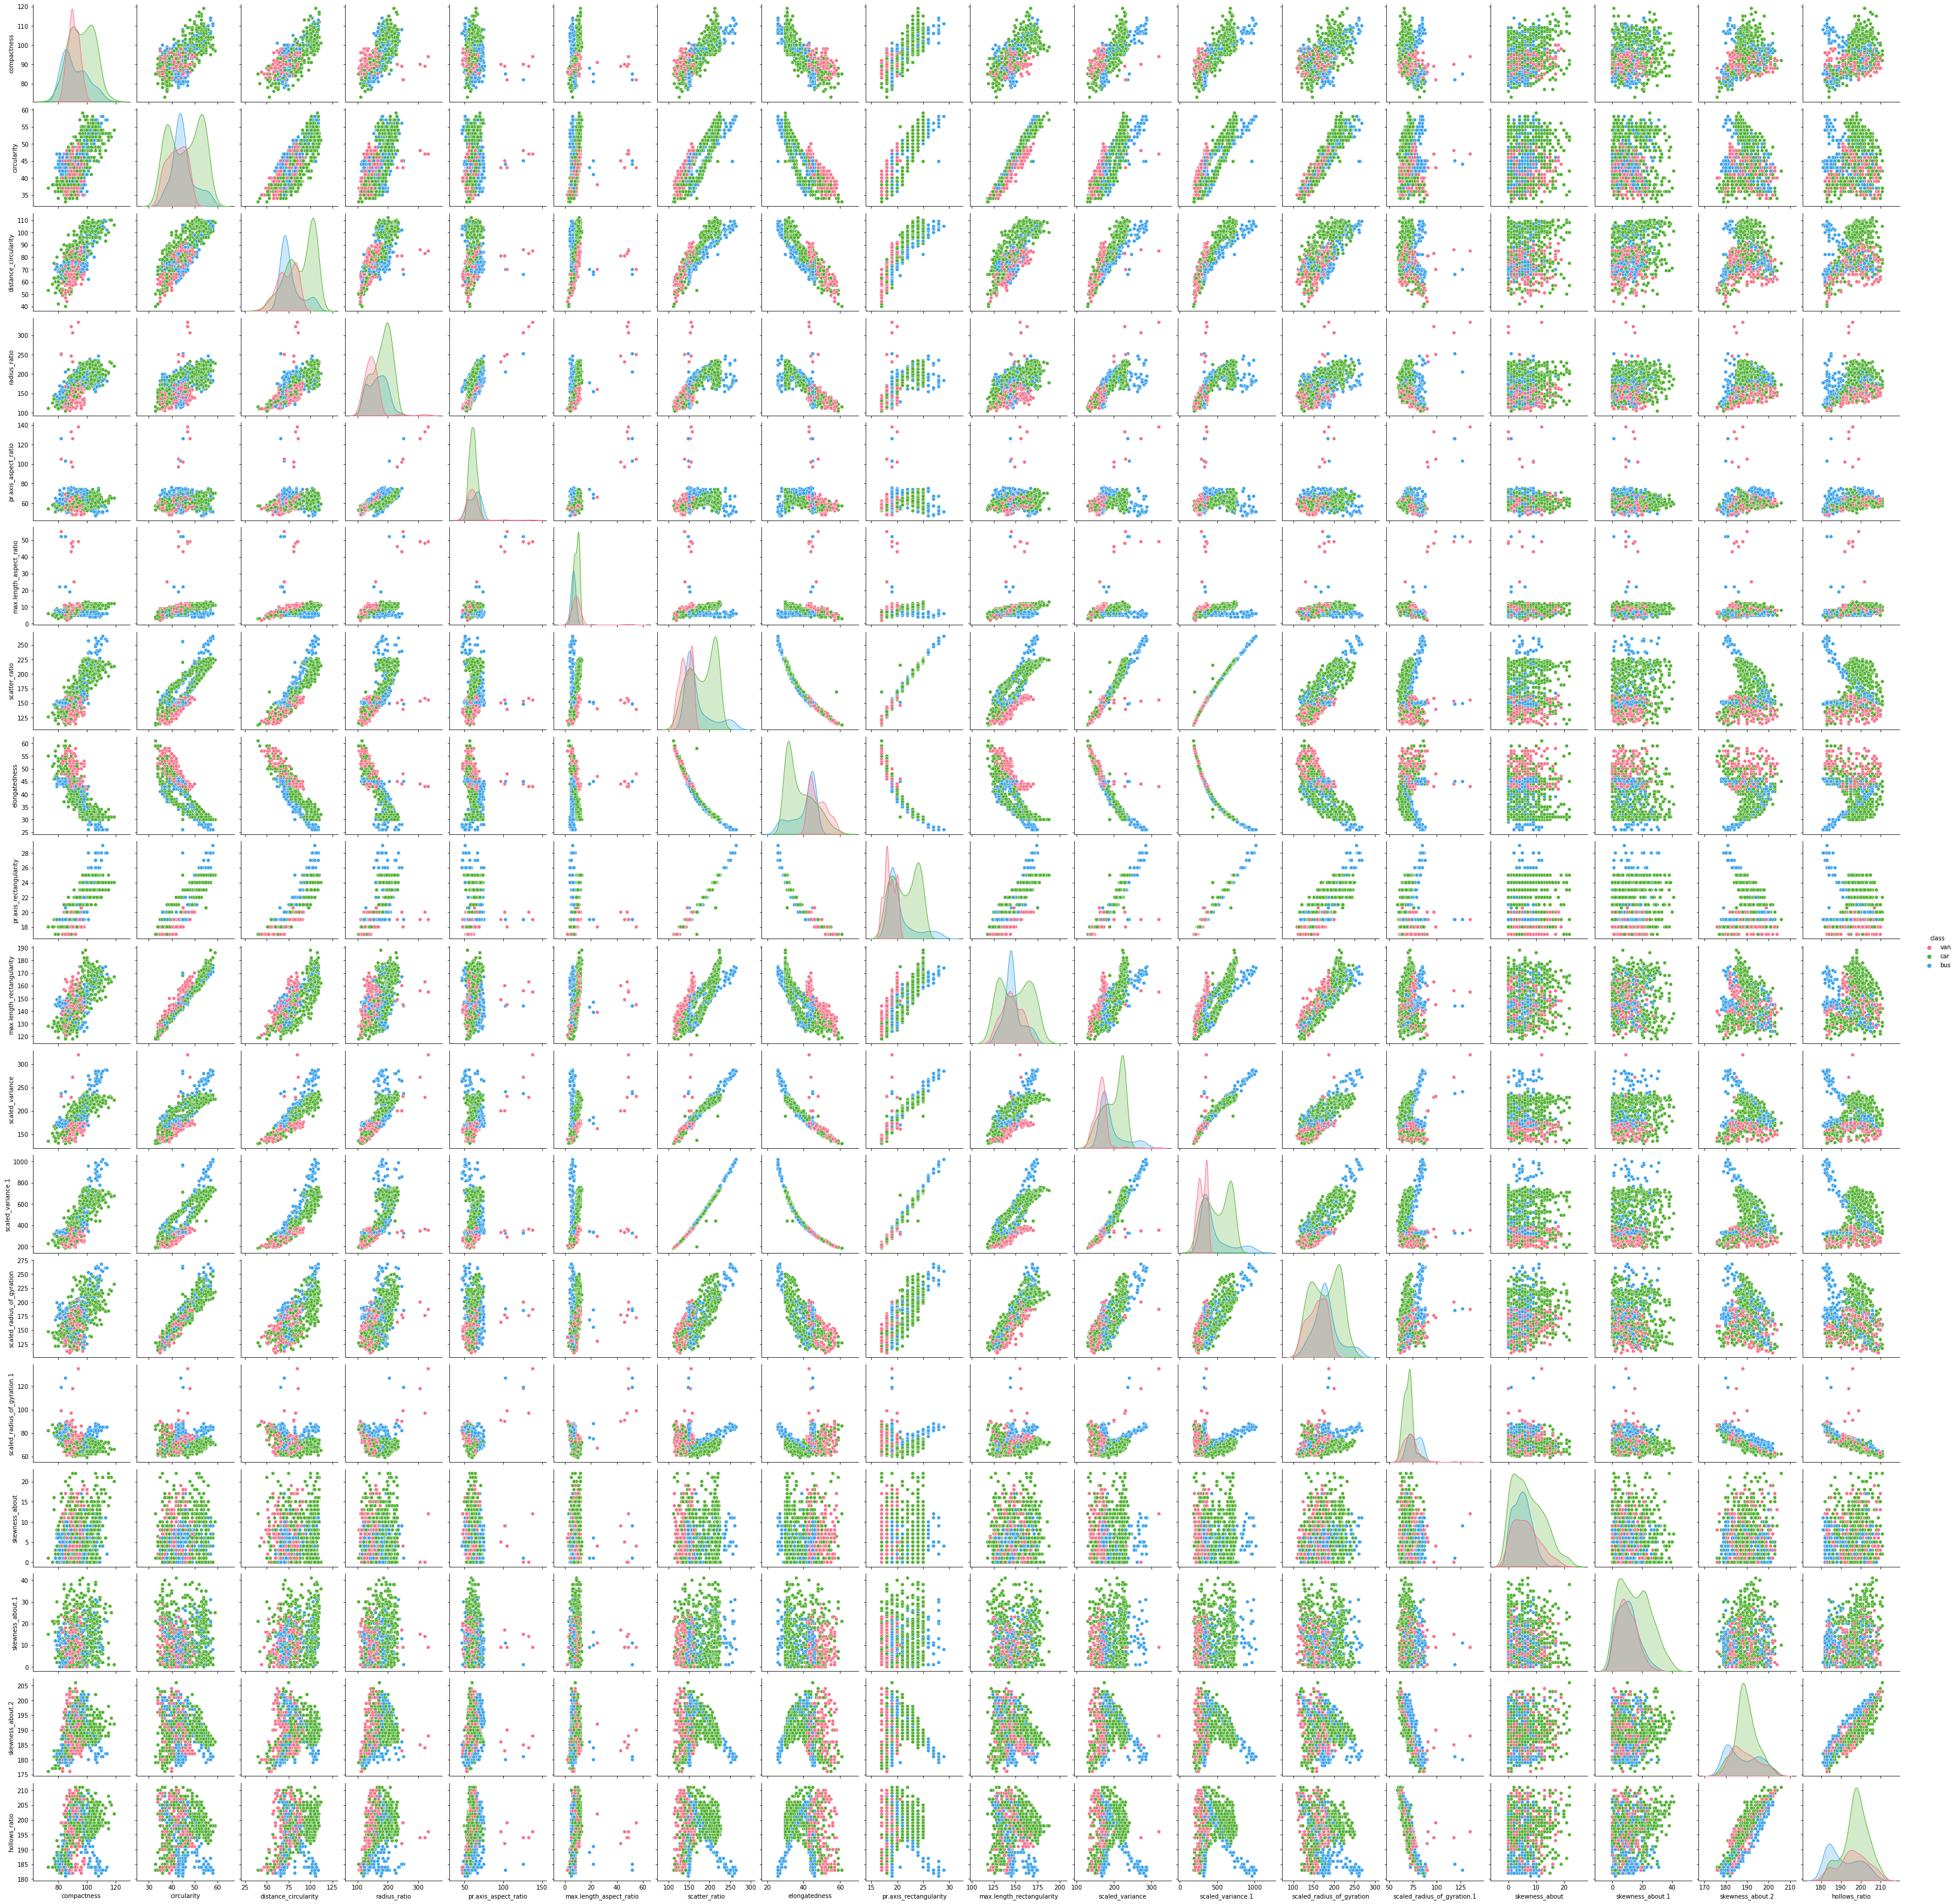

In [89]:
# Pairplot for checking the correlation
sns.pairplot(vehicle, hue="class", palette="husl")

<AxesSubplot:>

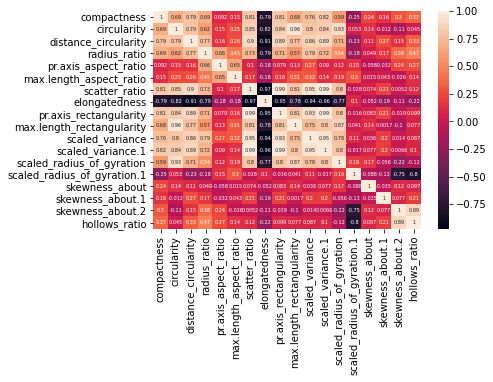

In [90]:
# Heatmap
sns.heatmap(vehicle.corr(),annot=True, annot_kws={'size': 5})

In [184]:
# independant variables
X = vehicle.drop(['class'], axis=1)
# the dependent variable
y = vehicle[['class']]

sns.pairplot(X, diag_kind='kde')   # to plot density curve instead of histogram on the diag

## 3) Classifier

In [185]:
# Design and train a best fit SVM classier using all the data attributes.

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x]== predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [186]:
X_svm = np.array(vehicle)[ :, 1:18] 
y_svm = np.array(vehicle)[:,-1] 

X_train = X_svm[:500, :]
X_test = X_svm[501: , :]
y_train = y_svm[:500]
y_test = y_svm[501:]

In [187]:
# Build Model
clf = svm.SVC(gamma=0.025, C=3)   
clf.fit(X_train , y_train)

SVC(C=3, gamma=0.025)

In [188]:
y_svm_pred = clf.predict(X_test)

In [326]:
print("Accuracy of SVM model on all attributes without scaling : ")
getAccuracy(y_test , y_svm_pred)

Accuracy of SVM model on all attributes without scaling : 


57.971014492753625

## 4) Dimensional reduction

In [210]:
# At first analyze how many dimesions are required to capture uto or mor than 90%

XScaled=X.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517302              0.056545      0.272965   
1    -0.325470    -0.624564              0.120112     -0.835442   
2     1.254193     0.843549              1.518571      1.201630   
3    -0.082445    -0.624564             -0.007021     -0.296217   
4    -1.054545    -0.135193             -0.769817      1.081803   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310206                 0.311542      -0.208038   
1             -0.593962                 0.094079      -0.599893   
2              0.548539                 0.311542       1.148382   
3              0.167705                 0.094079      -0.750606   
4              5.245485                 9.444962      -0.599893   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136580               -0.225160                   0.758332   
1       0.520853               -0.611739                  -0.344578   
2      -1.144331                0.934576                   0.689401   
3       0.648945               -0.611739                  -0.344578   
4       0.520853               -0.611739                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.403077          -0.343028                   0.285618   
1        -0.594546          -0.620879                  -0.513719   
2         1.096764           1.108603                   1.392391   
3        -0.913661          -0.739958                  -1.466773   
4         1.671171          -0.649231                   0.408593   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327938       -0.074340          0.380665   
1                    -0.059987        0.537873          0.156589   
2                     0.073989        1.558230         -0.403603   
3                    -1.265769       -0.074340         -0.291565   
4                     7.308682        0.537873         -0.179527   

   skewness_about.2  hollows_ratio  
0         -0.312193       0.183957  
1          0.013088       0.452977  
2         -0.149552       0.049447  
3          1.639494       1.529056  
4         -1.450677      -1.699181

In [211]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68623251  0.79084412  0.69065619  0.09181254  0.14842463
   0.81319623 -0.78957587  0.81459888  0.67694334  0.76367265  0.81686705
   0.58584865 -0.25036693  0.23596607  0.15757316  0.2988797   0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.62170187  0.15354334  0.25150523
   0.84921058 -0.82287347  0.84597164  0.96308094  0.7977645   0.83951746
   0.92798524  0.05270433  0.14456452 -0.01186527 -0.1057698   0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.76798667  0.15858456  0.26486339
   0.90547061 -0.91251368  0.89418513  0.77558624  0.86300031  0.88837793
   0.70678835 -0.2261194   0.1139479   0.26586756  0.14573497  0.3324884 ]
 [ 0.69065619  0.62170187  0.76798667  1.00118343  0.6643445   0.45056889
   0.73509724 -0.79072934  0.70912305  0.56987817  0.79498064  0.72100219
   0.5371705  -0.1810333   0.04877731  0.17403799  0.38258162  0.47181974]
 [ 0.09181254  0.15354334  0.15858456  0.6643445   1.00118343  0.64947191
   0.1038381  -0.18348087  0.07948

In [212]:
pca = PCA(n_components=18)
pca.fit(XScaled)

PCA(n_components=18)

In [213]:
# Eigen Values
print(pca.explained_variance_)

[9.40828822e+00 3.01605477e+00 1.90347881e+00 1.18027268e+00
 9.17174067e-01 5.39279825e-01 3.58566463e-01 2.21661730e-01
 1.60036194e-01 9.17140864e-02 6.65751851e-02 4.59556829e-02
 3.54023825e-02 2.67096104e-02 2.03690624e-02 1.74414127e-02
 9.23357029e-03 3.08801865e-03]


In [214]:
# Eigen Vectors
print(pca.components_)

[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 -9.

In [215]:
# % of variation explained by each eigen vector
print(pca.explained_variance_ratio_)

[5.22064851e-01 1.67360538e-01 1.05623824e-01 6.54931979e-02
 5.08938854e-02 2.99245766e-02 1.98968125e-02 1.22999843e-02
 8.88039031e-03 5.08920430e-03 3.69424950e-03 2.55007565e-03
 1.96447421e-03 1.48211326e-03 1.13027697e-03 9.67822019e-04
 5.12369772e-04 1.71353806e-04]


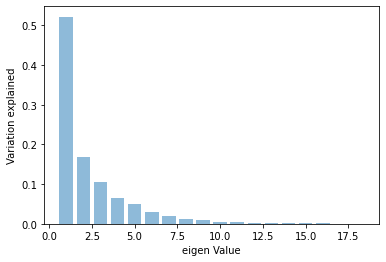

In [216]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

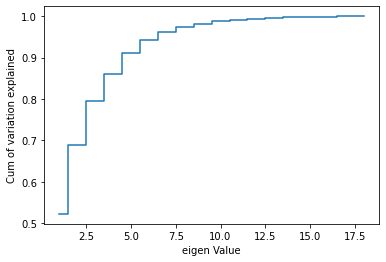

In [217]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [293]:
## Reducing Dimesion to 5

pca5 = PCA(n_components=5)
pca5.fit(XScaled)
print(pca5.components_)
print(pca5.explained_variance_ratio_)
Xpca5 = pca5.transform(XScaled)

[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929275e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 -9.

In [294]:
Xpca5

array([[ 3.32393198e-01, -2.18638382e-01,  1.00128619e+00,
         1.77327855e-01,  7.91062376e-02],
       [-1.59374091e+00, -4.20549398e-01, -3.69264301e-01,
         2.33484079e-01,  6.93397239e-01],
       [ 3.76753509e+00,  1.95040767e-01,  8.82372311e-02,
         1.20312936e+00,  7.30906518e-01],
       ...,
       [ 4.80780979e+00, -1.82373823e-03,  5.32772800e-01,
         2.95987951e-01, -1.34473735e+00],
       [-3.29572788e+00, -1.00880341e+00, -3.57467658e-01,
        -1.93324092e+00,  4.30752769e-02],
       [-4.76673461e+00,  3.34686477e-01, -5.68739264e-01,
        -1.22499022e+00, -5.42871253e-02]])

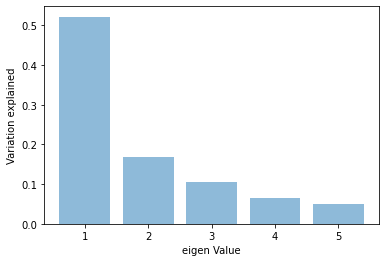

In [295]:
plt.bar(list(range(1,6)),pca5.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

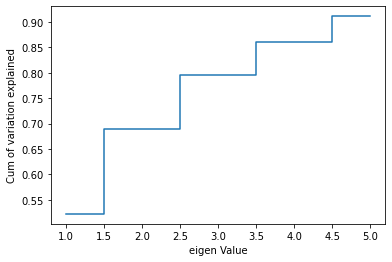

In [296]:
plt.step(list(range(1,6)),np.cumsum(pca5.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

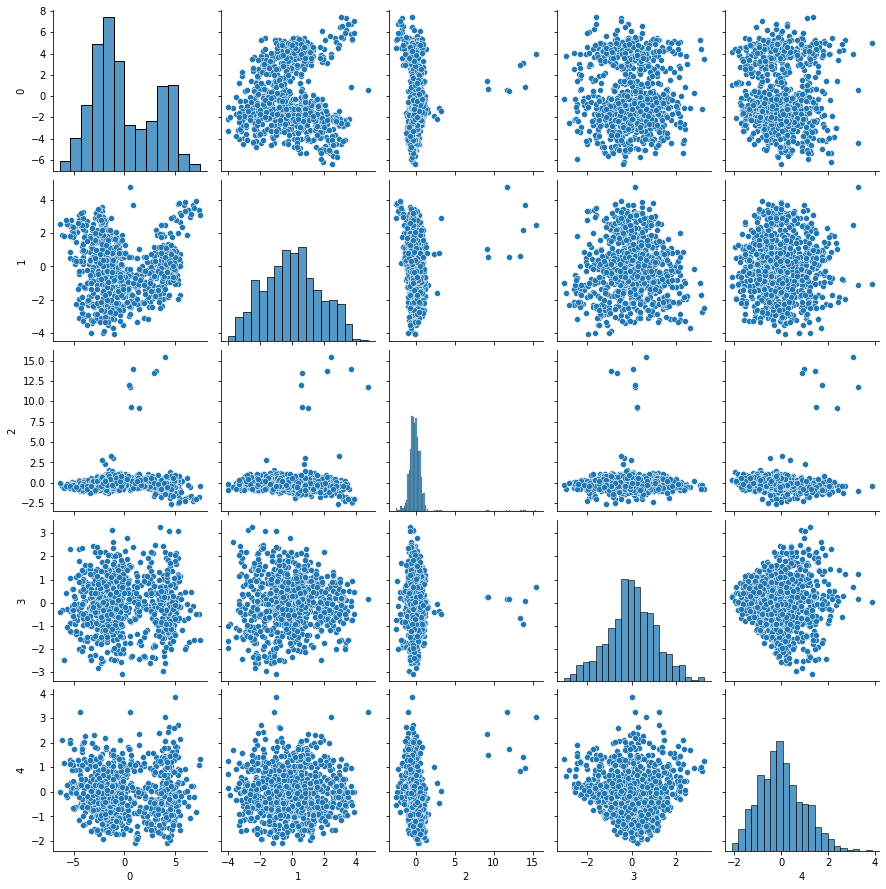

In [327]:
 sns.pairplot(pd.DataFrame(Xpca5))

## 5) Classifier

In [273]:
# Design and train a best fit SVM classier using dimensionally reduced attributes.

In [300]:
# SVM on Scaled data

X_svm_Scaled = np.array(XScaled)[ :, 1:18] 
y_svm_Scaled = np.array(y)[:] 

X_train_after_Scaled = X_svm_Scaled[:500, :]
X_test_after_Scaled = X_svm_Scaled[501: , :]
y_train_after_Scaled = y_svm_Scaled[:500]
y_test_after_Scaled = y_svm_Scaled[501:]

In [301]:
# Build Model
clf_after_Scaled = svm.SVC(gamma=0.025, C=3)   
clf_after_Scaled.fit(X_train_after_Scaled , y_train_after_Scaled)

C:\Users\Dhanashri\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=3, gamma=0.025)

In [302]:
y_svm_pred_after_Scaled = clf_after_Scaled.predict(X_test_after_Scaled)

In [303]:
print("Accuracy of SVM model on Scaled Data : ")
getAccuracy(y_test_after_Scaled , y_svm_pred_after_Scaled)

Accuracy of SVM model on Scaled Data : 


95.3623188405797

In [305]:
actual_class = ['van','bus','car']
pred_class=["Pr "+s for s in actual_class]

<AxesSubplot:>

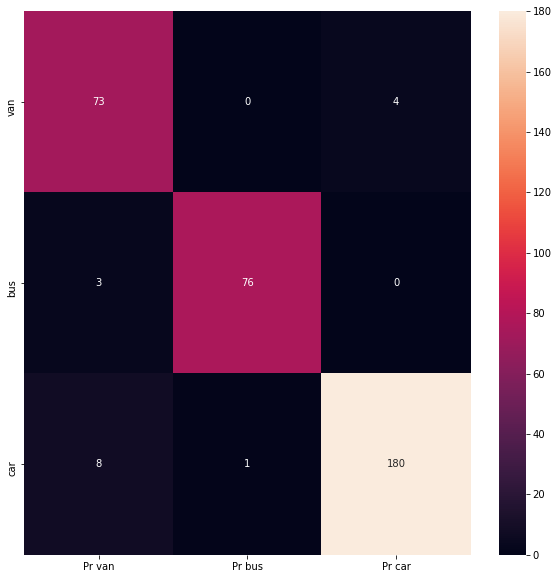

In [320]:
from sklearn import metrics
import seaborn as sns

cm=metrics.confusion_matrix(y_test_after_Scaled, y_svm_pred_after_Scaled, labels=actual_class)

df_cm = pd.DataFrame(cm, index = [i for i in actual_class],
                  columns = [i for i in pred_class])
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True ,fmt='g')

#### The heatmap above shows prediction of SVM on Scaled data
#### 73 of vans are predicted correctly however 4 vans are wrongly predicted as car
#### 76 of buses are predicted correctly however 3 bus are wrongly predicted as van
#### 180 of cars are predicted correctly however 8 cars are wrongly predicted as van and 1 car is predicted as bus

In [321]:
# SVM on reduced dimensions, Dimesion =5

X_svm_after_DR = np.array(Xpca5)[ :, 1:18] 
y_svm_after_DR = np.array(y)[:] 

X_train_after_DR = X_svm_after_DR[:500, :]
X_test_after_DR = X_svm_after_DR[501: , :]
y_train_after_DR = y_svm_after_DR[:500]
y_test_after_DR = y_svm_after_DR[501:]

In [322]:
# Build Model
clf_after_DR = svm.SVC(gamma=0.025, C=3)   
clf_after_DR.fit(X_train_after_DR , y_train_after_DR)

C:\Users\Dhanashri\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=3, gamma=0.025)

In [323]:
y_svm_pred_after_DR = clf_after_DR.predict(X_train_after_DR)

In [324]:
print("Accuracy of SVM model on Reduced Dimesions : ")
getAccuracy(y_test_after_DR , y_svm_pred_after_DR)

Accuracy of SVM model on Reduced Dimesions : 


49.275362318840585

## 6) Conclusion

#### After reducing the dimesions from 18 to 5 we are able to see a huge drop in ccuracy by SVM model.
#### Case 1: The accuracy of SVM with 18 features is 58 % ( without scaling data)
#### Case 2: The accuracy of SVM with 18 features is 95 % ( on scaled data)
#### Case 3: The accuracy of SVM with 5 features is 50 % ( on scaled data)
#### If we compare Case 1 and Case 3, then by reducing features from 18 to 5 we are dropping the accuracy by 8% only.

# Part 4

In [499]:
#Import data set
bat=pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')
bat.head()

Name   Runs    Ave      SR  Fours  Sixes   HF
0        NaN    NaN    NaN     NaN    NaN    NaN  NaN
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2        NaN    NaN    NaN     NaN    NaN    NaN  NaN
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4        NaN    NaN    NaN     NaN    NaN    NaN  NaN

In [500]:
bat=bat.dropna()

In [501]:
bat.reset_index(drop=True, inplace=True)

In [502]:
bat.head()

Name   Runs    Ave      SR  Fours  Sixes   HF
0   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
1  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
2   V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0
3   CL White  479.0  43.54  149.68   41.0   20.0  5.0
4   S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0

In [503]:
print('Dimension of Part4 - batting_bowling_ipl_bat is : ',bat.shape)

Dimension of Part4 - batting_bowling_ipl_bat is :  (90, 7)


In [504]:
bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.0+ KB


In [505]:
bat.isnull().sum()

Name     0
Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

In [506]:
bat.describe().transpose()

count        mean         std    min      25%      50%       75%  \
Runs    90.0  219.933333  156.253669   2.00   98.000  196.500  330.7500   
Ave     90.0   24.729889   13.619215   0.50   14.665   24.440   32.1950   
SR      90.0  119.164111   23.656547  18.18  108.745  120.135  131.9975   
Fours   90.0   19.788889   16.399845   0.00    6.250   16.000   28.0000   
Sixes   90.0    7.577778    8.001373   0.00    3.000    6.000   10.0000   
HF      90.0    1.188889    1.688656   0.00    0.000    0.500    2.0000   

          max  
Runs   733.00  
Ave     81.33  
SR     164.10  
Fours   73.00  
Sixes   59.00  
HF       9.00

## EDA and Visualization

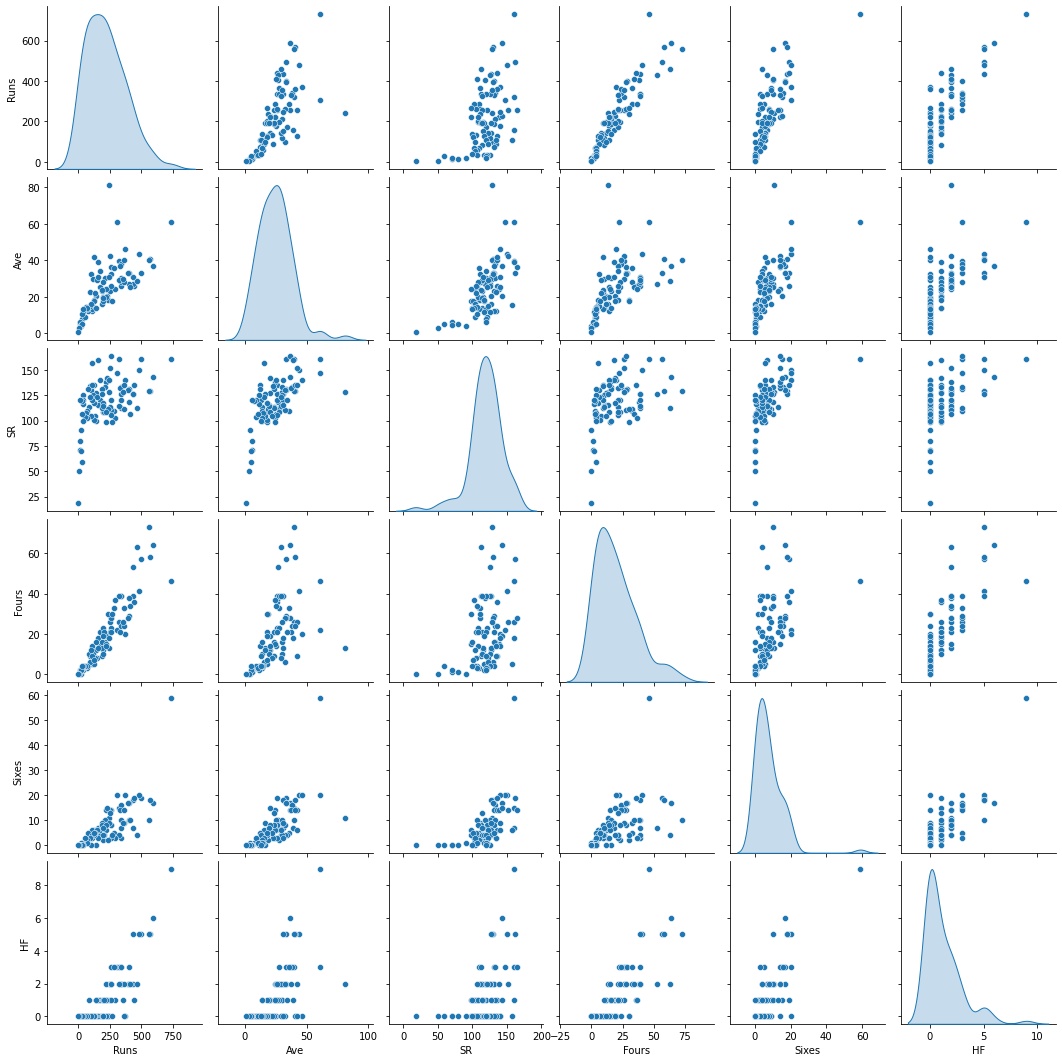

In [350]:
# Detailed statistical analysis on the data
bat_attr = bat.iloc[:, 0:7]
sns.pairplot(bat_attr, diag_kind='kde') 

We can see a little bit linear relationship between 'Runs', 'Avg', 'Sixes' and 'HF'. However we are unable to see any linear relationship of 'SR' with any other parameter

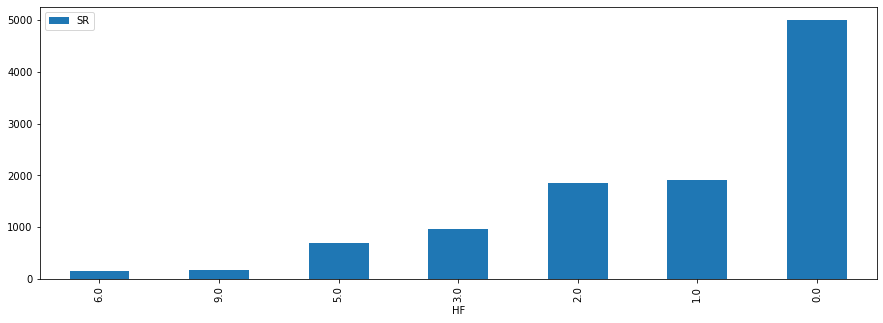

In [462]:
#Bar plot to check HF
bat.groupby(by=['HF'])['SR'].sum().reset_index().sort_values(['SR'],
                    ascending=True).head(10).plot(x='HF',y='SR',kind='bar', figsize=(15,5))

plt.show()

Looking above we can conclude that, batsman who have scored more six have less Strike Rate

C:\Users\Dhanashri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SR', ylabel='Runs'>

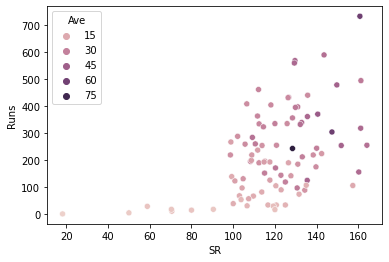

In [463]:
#Scatterplot
sns.scatterplot(bat['SR'],bat['Runs'],hue=bat['Ave'])

Higher Average have higher Strike Rate

<AxesSubplot:xlabel='Sixes', ylabel='SR'>

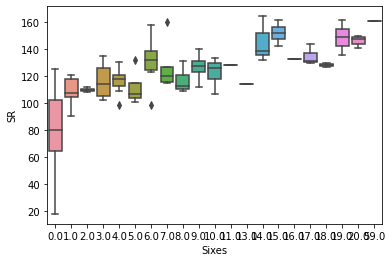

In [464]:
#Boxplot
sns.boxplot(x=bat['Sixes'],y=bat['SR'])

<AxesSubplot:xlabel='Fours', ylabel='Runs'>

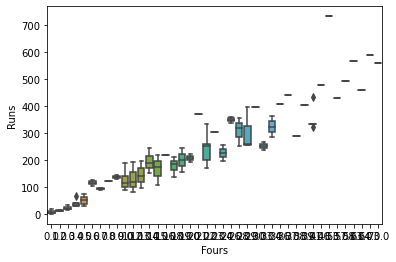

In [439]:
sns.boxplot(x=bat['Fours'],y=bat['Runs'])

<AxesSubplot:xlabel='Fours', ylabel='Sixes'>

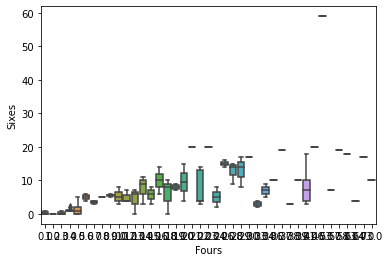

In [360]:
sns.boxplot(x=bat['Fours'],y=bat['Sixes'])

The boxplot has not been very informative in this case

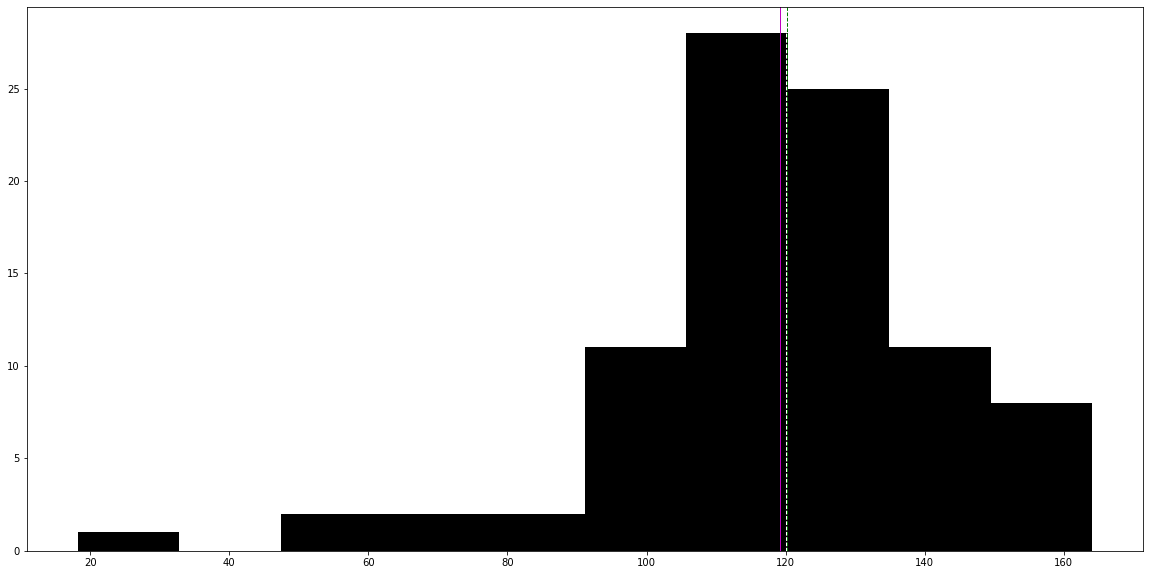

In [465]:
data_hist=bat['SR']
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(data_hist, color=["k"]) # plots a simple histogram
plt.axvline(data_hist.mean(), color='m', linewidth=1)
plt.axvline(data_hist.median(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(data_hist.mode()[0], color='w', linestyle='dashed', linewidth=1)
#It gives the idea about frequency of TotalCharges

Mean = 118 ,Median = 120 ,Mode = 120

In [466]:
#Statistical Analysis

#IQR of Average Runs
bat['Ave'].quantile(0.75)-bat['Ave'].quantile(0.25)

17.53

Text(1.15, 110, 'IQR')

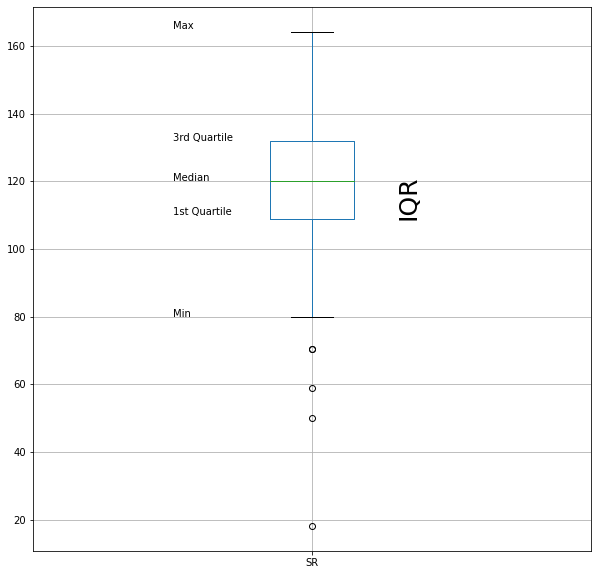

In [467]:
#Create boxplot for column Strike Rate
bat.boxplot(column="SR",return_type='axes',figsize=(10,10))

# create text(x=0.74, y=22.25, s="3rd Quartile")like Median, 1st Quartile,Min,Max,IQR:
plt.text(x=0.75, y=132.00, s="3rd Quartile")
plt.text(x=0.75, y=120.00, s="Median")
plt.text(x=0.75, y=110.00, s="1st Quartile")
plt.text(x=0.75, y=80.00, s="Min")
plt.text(x=0.75, y=165.00, s="Max")
plt.text(x=1.15, y=110, s="IQR", rotation=90, size=25)

Strike Rate has many outliers. We can replace the outliers with median

Text(1.15, 125, 'IQR')

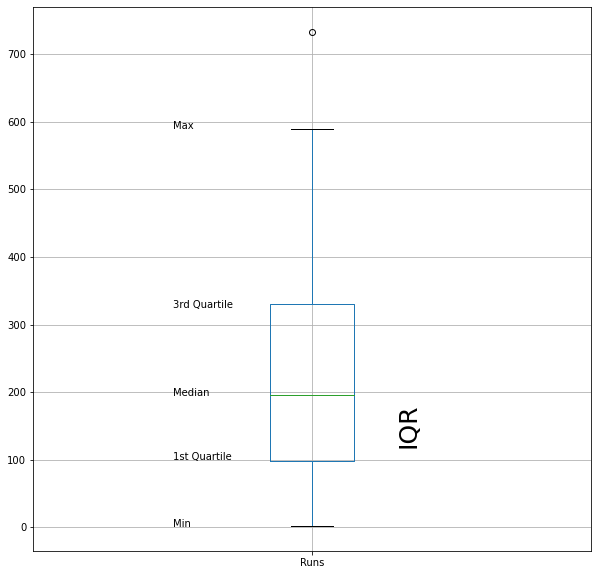

In [468]:
#Create boxplot for column Runs
bat.boxplot(column="Runs",return_type='axes',figsize=(10,10))

# create text(x=0.74, y=22.25, s="3rd Quartile")like Median, 1st Quartile,Min,Max,IQR:
plt.text(x=0.75, y=325.00, s="3rd Quartile")
plt.text(x=0.75, y=195.00, s="Median")
plt.text(x=0.75, y=100.00, s="1st Quartile")
plt.text(x=0.75, y=0.00, s="Min")
plt.text(x=0.75, y=590.00, s="Max")
plt.text(x=1.15, y=125, s="IQR", rotation=90, size=25)

Text(1.15, 20, 'IQR')

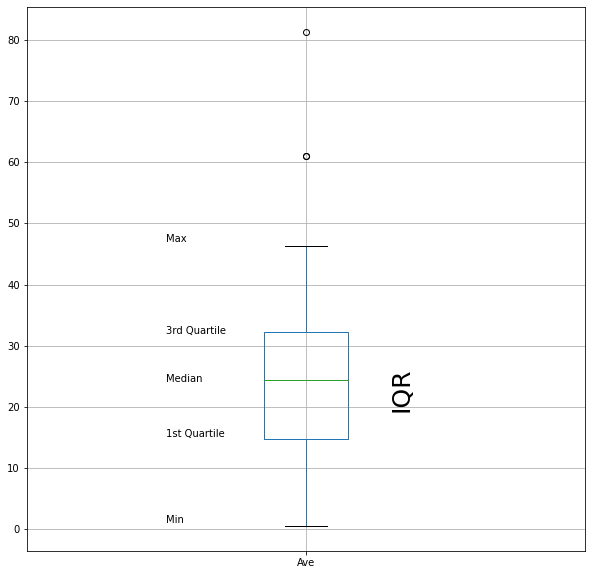

In [469]:
#Create boxplot for column Average
bat.boxplot(column="Ave",return_type='axes',figsize=(10,10))

# create text(x=0.74, y=22.25, s="3rd Quartile")like Median, 1st Quartile,Min,Max,IQR:
plt.text(x=0.75, y=32.00, s="3rd Quartile")
plt.text(x=0.75, y=24.00, s="Median")
plt.text(x=0.75, y=15.00, s="1st Quartile")
plt.text(x=0.75, y=1.00, s="Min")
plt.text(x=0.75, y=47.00, s="Max")
plt.text(x=1.15, y=20, s="IQR", rotation=90, size=25)

Text(1.15, 15, 'IQR')

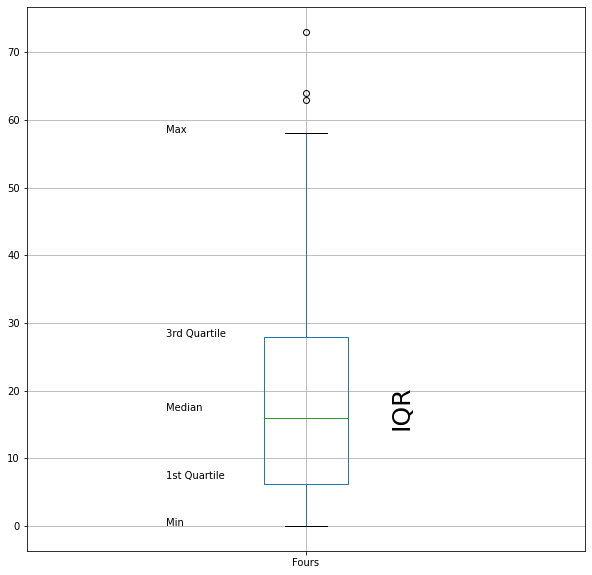

In [470]:
#Create boxplot for column Fours
bat.boxplot(column="Fours",return_type='axes',figsize=(10,10))

# create text(x=0.74, y=22.25, s="3rd Quartile")like Median, 1st Quartile,Min,Max,IQR:
plt.text(x=0.75, y=28.00, s="3rd Quartile")
plt.text(x=0.75, y=17.00, s="Median")
plt.text(x=0.75, y=7.00, s="1st Quartile")
plt.text(x=0.75, y=0.00, s="Min")
plt.text(x=0.75, y=58.00, s="Max")
plt.text(x=1.15, y=15, s="IQR", rotation=90, size=25)

Text(1.15, 5, 'IQR')

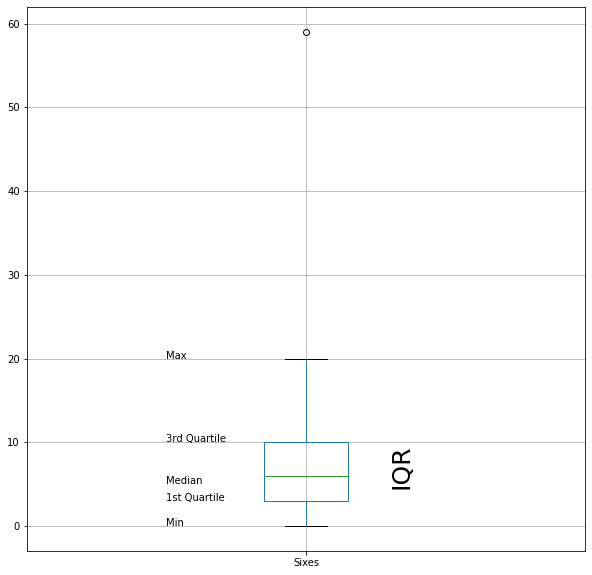

In [471]:
#Create boxplot for column Sixes
bat.boxplot(column="Sixes",return_type='axes',figsize=(10,10))

# create text(x=0.74, y=22.25, s="3rd Quartile")like Median, 1st Quartile,Min,Max,IQR:
plt.text(x=0.75, y=10.00, s="3rd Quartile")
plt.text(x=0.75, y=5.00, s="Median")
plt.text(x=0.75, y=3.00, s="1st Quartile")
plt.text(x=0.75, y=0.00, s="Min")
plt.text(x=0.75, y=20.00, s="Max")
plt.text(x=1.15, y=5, s="IQR", rotation=90, size=25)

Text(1.15, 1, 'IQR')

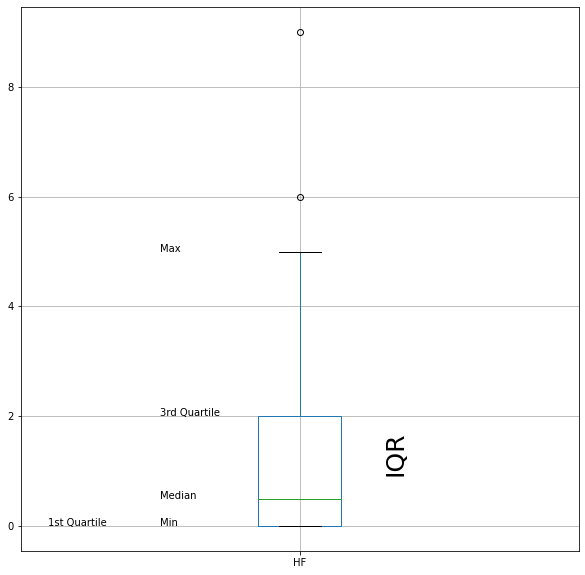

In [472]:
#Create boxplot for column Half Century
bat.boxplot(column="HF",return_type='axes',figsize=(10,10))

# create text(x=0.74, y=22.25, s="3rd Quartile")like Median, 1st Quartile,Min,Max,IQR:
plt.text(x=0.75, y=2.00, s="3rd Quartile")
plt.text(x=0.75, y=0.50, s="Median")
plt.text(x=0.55, y=0.00, s="1st Quartile")
plt.text(x=0.75, y=0.00, s="Min")
plt.text(x=0.75, y=5.00, s="Max")
plt.text(x=1.15, y=1, s="IQR", rotation=90, size=25)

Every column has outliers. Replace the outliers with median value 

In [508]:
#Replacing outliers with mean value

#lower_ave = bat['Ave'] <= (bat['Ave'].quantile(0.25)-1.5*bat['Ave'].quantile(0.50))
#upper_ave = bat['Ave'] >= (bat['Ave'].quantile(0.75)+1.5*bat['Ave'].quantile(0.50))
#lower_SR = bat['SR'] <= (bat['SR'].quantile(0.25)-1.5*bat['SR'].quantile(0.50))
#upper_SR = bat['SR'] >= (bat['SR'].quantile(0.75)+1.5*bat['SR'].quantile(0.50))
#lower_Fours = bat['Fours'] <= (bat['Fours'].quantile(0.25)-1.5*bat['Fours'].quantile(0.50))
#upper_Fours = bat['Fours'] >= (bat['Fours'].quantile(0.75)+1.5*bat['Fours'].quantile(0.50))
#lower_Sixes = bat['Sixes'] <= (bat['Sixes'].quantile(0.25)-1.5*bat['Sixes'].quantile(0.50))
#upper_Sixes = bat['Sixes'] >= (bat['Sixes'].quantile(0.75)+1.5*bat['Sixes'].quantile(0.50))
#lower_HF = (bat['HF'].quantile(0.25)-1.5*bat['HF'].quantile(0.50))
#upper_HF = (bat['HF'].quantile(0.75)+1.5*bat['HF'].quantile(0.50))
#lower_HF = bat[(bat['HF'] > 8.80) | (bat['HF'] < 5.11)]
#Q1_HF=bat['HF'].quantile(0.25)
#Q3_HF=bat['HF'].quantile(0.75)
#median_HF=bat['HF'].median()
#IQR_HF = Q3_HF-Q1_HF
#min_HF = Q1_HF-(1.5*IQR_HF)
#max_HF = Q3_HF+(1.5*IQR_HF)
#bat['HF'] = bat[(bat['HF'] > max_HF) | (bat['HF'] < min_HF)]
#bat['Ave']=bat[(bat['Ave'] > upper_ave) | (bat['Ave'] < lower_ave)]
#bat['SR']=bat[(bat['SR'] > upper_SR) | (bat['SR'] < lower_SR)]
#bat['Fours']=bat[(bat['Fours'] > upper_Fours) | (bat['Fours'] < lower_Fours)]
#bat['Sixes']=bat[(bat['Sixes'] > upper_Sixes) | (bat['Sixes'] < lower_Sixes)]
#bat['HF']=bat[(bat['HF'] > upper_HF) | (bat['HF'] < lower_HF)]
#bat['HF']=bat['HF'].drop(upper_HF[0], inplace = True)
#bat['HF']=bat['HF'].drop(lower_HF[0], inplace = True)

bat['Runs']=bat['Runs'].replace(bat['Runs'].max(),bat['Runs'].mean())
bat['SR']=bat['SR'].replace(bat['SR'].min(),bat['SR'].mean())
bat['SR']=bat['SR'].replace(bat['SR'].min(),bat['SR'].mean())
bat['SR']=bat['SR'].replace(bat['SR'].min(),bat['SR'].mean())
bat['SR']=bat['SR'].replace(bat['SR'].min(),bat['SR'].mean())
bat['Ave']=bat['Ave'].replace(bat['Ave'].max(),bat['Ave'].mean())
bat['Ave']=bat['Ave'].replace(bat['Ave'].max(),bat['Ave'].mean())
bat['Fours']=bat['Fours'].replace(bat['Fours'].max(),bat['Fours'].mean())
bat['Fours']=bat['Fours'].replace(bat['Fours'].max(),bat['Fours'].mean())
bat['Fours']=bat['Fours'].replace(bat['Fours'].max(),bat['Fours'].mean())
bat['Sixes']=bat['Sixes'].replace(bat['Sixes'].max(),bat['Sixes'].mean())
bat['HF']=bat['HF'].replace(bat['HF'].max(),bat['HF'].mean())
bat['HF']=bat['HF'].replace(bat['HF'].max(),bat['HF'].mean())
#bat.head()

Text(1.15, 125, 'IQR')

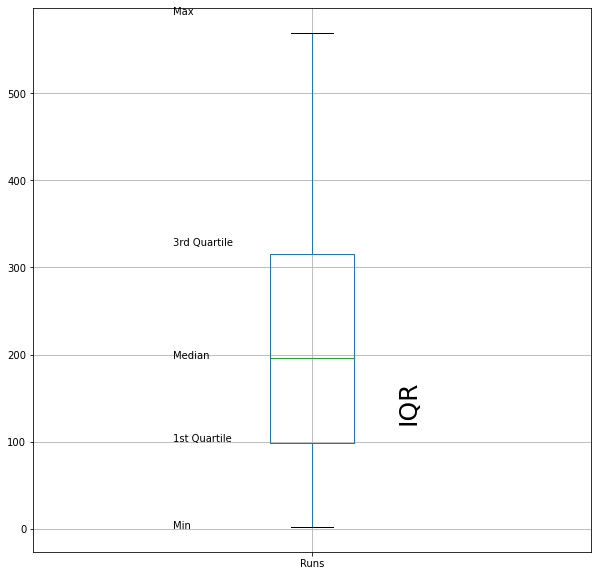

In [509]:
#Create boxplot for column Runs
bat.boxplot(column="Runs",return_type='axes',figsize=(10,10))

# create text(x=0.74, y=22.25, s="3rd Quartile")like Median, 1st Quartile,Min,Max,IQR:
plt.text(x=0.75, y=325.00, s="3rd Quartile")
plt.text(x=0.75, y=195.00, s="Median")
plt.text(x=0.75, y=100.00, s="1st Quartile")
plt.text(x=0.75, y=0.00, s="Min")
plt.text(x=0.75, y=590.00, s="Max")
plt.text(x=1.15, y=125, s="IQR", rotation=90, size=25)

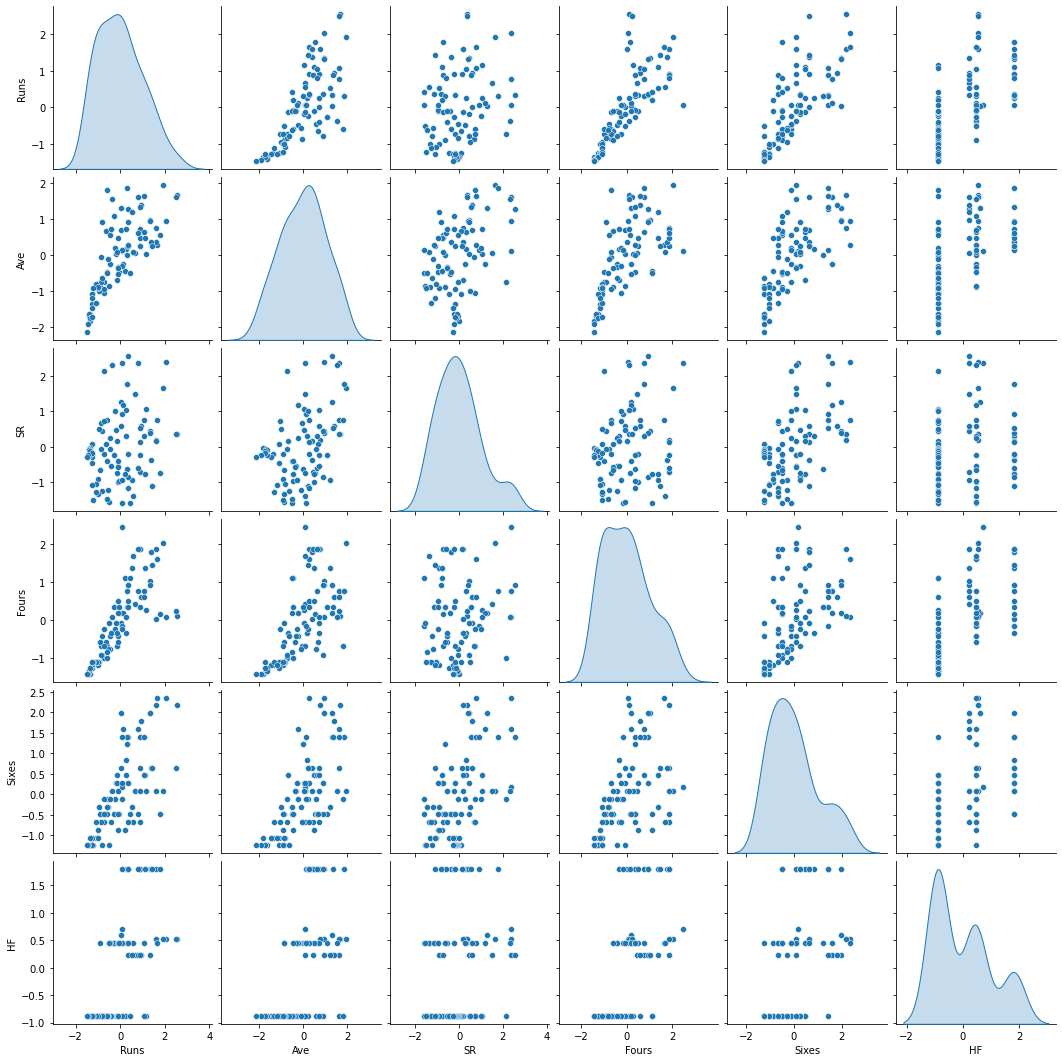

In [512]:
batAttr=bat.iloc[:,1:]
batScaled=batAttr.apply(zscore)
sns.pairplot(batScaled,diag_kind='kde')

C:\Users\Dhanashri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

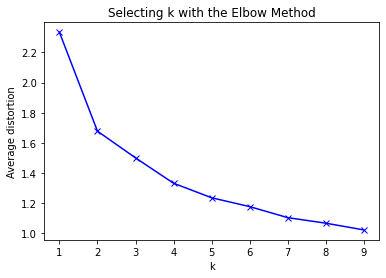

In [513]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(batScaled)
    prediction=model.predict(batScaled)
    meanDistortions.append(sum(np.min(cdist(batScaled, model.cluster_centers_, 'euclidean'), axis=1)) / batScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Though the bend is not coming out clearly as there are many bends, let us look at 2 clusters and 4 clusters

In [514]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(batScaled)
prediction=final_model.predict(batScaled)

#Append the prediction 
bat["GROUP"] = prediction
batScaled["GROUP"] = prediction
print("Groups Assigned : \n")
bat.head()

Groups Assigned : 



Name        Runs        Ave      SR      Fours      Sixes        HF  \
0   CH Gayle  219.933333  24.100999  160.74  46.000000   7.577778  1.188889   
1  G Gambhir  214.232593  36.870000  143.55  19.197654  17.000000  1.102099   
2   V Sehwag  495.000000  33.000000  161.23  17.765489  19.000000  1.047678   
3   CL White  479.000000  43.540000  149.68  41.000000   7.006420  1.047678   
4   S Dhawan  569.000000  40.640000  129.61  18.207627  18.000000  1.047678   

   GROUP  
0      1  
1      1  
2      1  
3      1  
4      1

In [515]:
# Analyze the distribution of the data among the two groups (K = 2). One of the most informative visual tool is boxplot.
batClust = bat.groupby(['GROUP'])
batClust.mean()

Runs        Ave          SR      Fours      Sixes        HF
GROUP                                                                   
0      111.540000  16.486200  117.592241   9.080000   3.220000  0.160000
1      333.204148  31.184914  131.440750  26.749726  10.764926  1.283153

array([[<AxesSubplot:title={'center':'Ave'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Fours'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'HF'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Runs'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'SR'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Sixes'}, xlabel='[GROUP]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

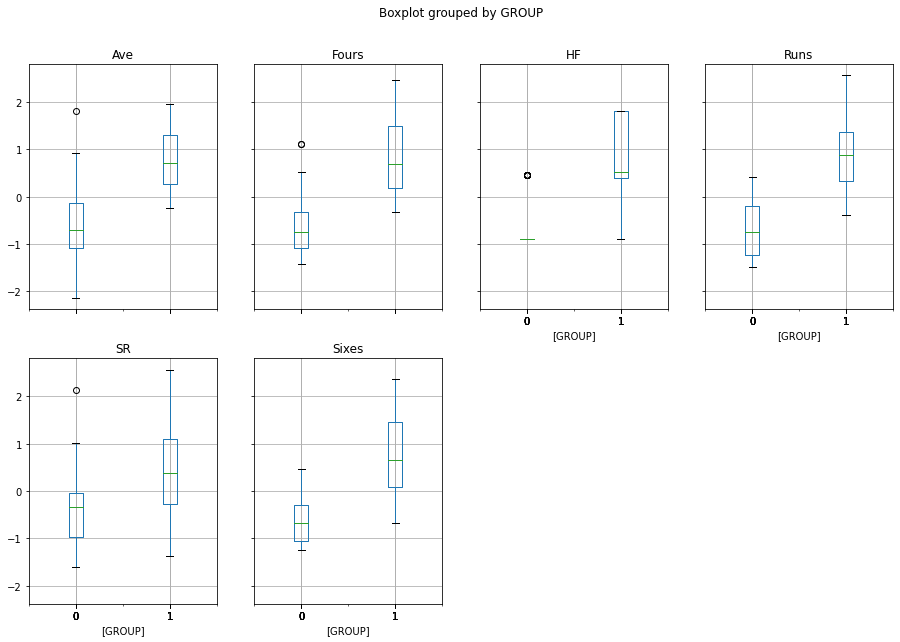

In [516]:
batScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [518]:
#  Let us next try with K = 4, the next elbow point
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(batScaled)
prediction=final_model.predict(batScaled)

#Append the prediction 
bat["GROUP"] = prediction
batScaled["GROUP"] = prediction
print("Groups Assigned : \n")
bat.head()

Groups Assigned : 



Name        Runs        Ave      SR      Fours      Sixes        HF  \
0   CH Gayle  219.933333  24.100999  160.74  46.000000   7.577778  1.188889   
1  G Gambhir  214.232593  36.870000  143.55  19.197654  17.000000  1.102099   
2   V Sehwag  495.000000  33.000000  161.23  17.765489  19.000000  1.047678   
3   CL White  479.000000  43.540000  149.68  41.000000   7.006420  1.047678   
4   S Dhawan  569.000000  40.640000  129.61  18.207627  18.000000  1.047678   

   GROUP  
0      3  
1      3  
2      3  
3      3  
4      3

In [519]:
# Analyze the distribution of the data among the four groups (K = 4). One of the most informative visual tool is boxplot.
batClust = bat.groupby(['GROUP'])
batClust.mean()

Runs        Ave          SR      Fours      Sixes        HF
GROUP                                                                   
0      171.423077  23.338462  116.452308  14.461538   4.923077  0.346154
1       51.680000  10.076400  118.884882   3.960000   1.480000  0.000000
2      332.866667  27.733326  115.486667  30.135293   7.466667  1.710414
3      340.131914  33.208195  141.877500  24.873319  13.108210  1.027912

array([[<AxesSubplot:title={'center':'Ave'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Fours'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'HF'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Runs'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'SR'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Sixes'}, xlabel='[GROUP]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

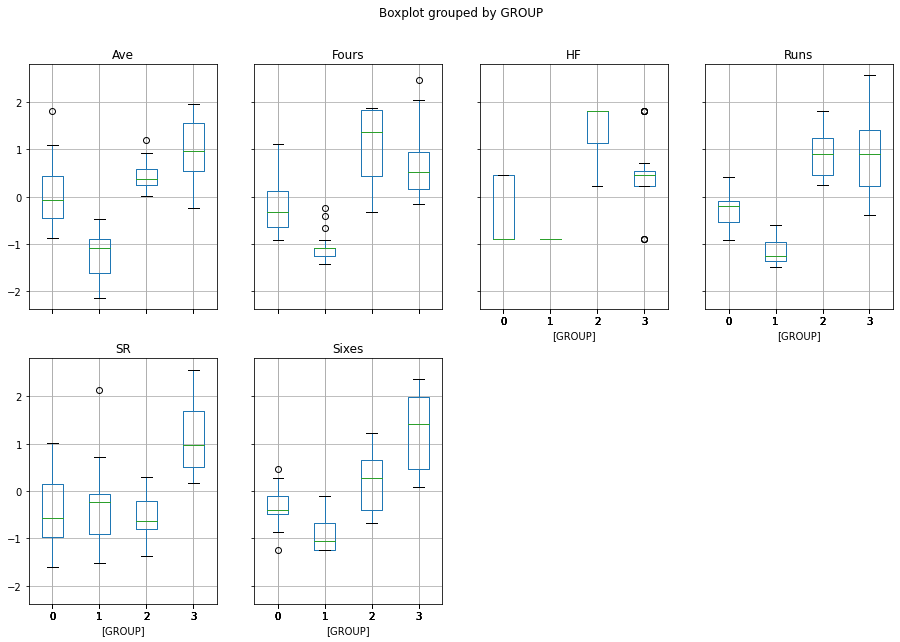

In [520]:
batScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

Looking above it is clear that, if we have 2 clusters those would be more distinct than if we have 4 clusters. SR is most important feature

# Part 5

Below are all possible dimensionality reduction techniques that can be implemented using python
a) PCA (Principal component Analysis)
b) Kernel PCA
c) LDA (Linear Discriminant Analysis)
d) SVD (Singular Value Decomposition)


1) Feature elimination
    Identify and remove less important attributes
2) Feature Extraction
    Create a few new variables from old variable
    a)PCA : It reduces the dimensionality of data by creating new variables from the existing variables

b) Kernel PCA maps the dataset to nonlinear feature space(higher dimension) and then apply PCA
c) LDA preserve as much discriminatory power as possible for the dependent variable while projecting the original data matrix onto a lower-dimensional space. It maximizes the between-class variance and minimizes the within-class variance
d) SVD is similiar to PCA with one advantage that it recreates the original dataset into smaller dataset

PCA can be used for multimedia data and text data

(254, 254, 3)


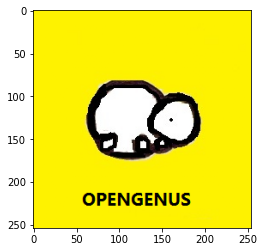

In [575]:
import matplotlib.image as mplib 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
#Reading an image and printing the shape of the image. 
img = mplib.imread('opengenus_logo.png')
print(img.shape)
plt.imshow(img)

In [578]:
#Reshaping the image to 2-dimensional so we are multiplying columns with depth so 225 X 3 = 675.

img_r = np.reshape(img, (381, 508)) 

print(img_r.shape)

(381, 508)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(381, 32)
0.9850643
(381, 508)
(254, 254, 3)


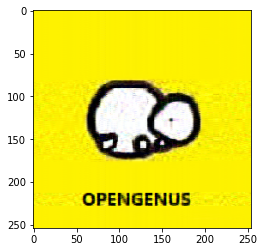

In [580]:
#Applying PCA so that it will compress the image, the reduced dimension is shown in the output. 

pca = PCA(32).fit(img_r) 
img_transformed = pca.transform(img_r) 
print(img_transformed.shape)
print(np.sum(pca.explained_variance_ratio_) )

#Retrieving the results of the image after Dimension reduction.
temp = pca.inverse_transform(img_transformed) 
print(temp.shape)
temp = np.reshape(temp, (254,254 ,3)) 
print(temp.shape) 
plt.imshow(temp)